# PREDICTING FAVOURITE CANDIES

<img src =  'https://github.com/padmapriyajain/MyPythonworld/blob/master/candy_new.jpg?raw=true' width="1400" height="400">

## Table of Contents

1. [Project Description](#section1) <br>
- 1.1 [Problem Statement](#section101)<br>
- 1.2 [Brief on Dataset](#section102)<br>
2. [Load Packages and Data](#section2) <br>
3. [Data Profiling](#section3)<br>
  - 3.1 [Missing Values](#section301)<br>
  - 3.2 [Data Manipulation/Updation](#section302)<br>
  - 3.3 [Deriving New Features](#section303)<br>
4. [EDA on Candy dataset](#section4)<br>
  - 4.1 [What are the count of candies with each compositions?](#section401)<br>
  - 4.2 [Which are the top 10 most popular and least popular candies?](#section402)<br>
  - 4.3 [What are the top 20 candies that are not chocolatey but yet popular?](#section403)<br>
  - 4.4 [Which are the top 20 costly candies?](#section404)<br>
  - 4.5 [What are the top 20 candies that are not chocolatey but yet costly?](#section405)<br>
  - 4.6 [Which are the top 20 sugary candies?](#section406)<br>
  - 4.7 [How the candies compositions varies with winpercent?](#section407)<br>
  - 4.8 [How the sugarpercent and pricepercent varies with winpercent?](#section408)<br>
  - 4.9 [What are the top 20 candies that are popular and cheap?](#section409)
  <br>
  - 4.10 [Which are the top 20 candies that are sugary and cheap?](#section4010)
  <br>
  - 4.11 [What are the most frequently used compositions in the given candies?](#section4011)
  - 4.12 [What is the correlation of compositions in the candies?](#section4012)
  <br>
  - 4.13 [Conclusions  from EDA of candy dataset](#section4013)
  <br>
5. [Model Assumptions](#section5)<br>
6. [Scaling of the Explanatory variables](#section6)<br>
7. [Model Predictions](#section7)<br>
  - 7.1 [Model Predictions with Feature Type1](#section701)
    - 7.1.1 [Split X and Y variables](#section70101)
    - 7.1.2 [Cross Validation](#section70102)
    - 7.1.3 [Instantiate and Fit the Models](#section70103)
    - 7.1.4 [Predict the Train and Test Values](#section70104)
    - 7.1.5 [Evaluation of the Models](#section70105)
  - 7.2 [Model Predictions with Feature Type2](#section702)
    - 7.2.1 [Split X and Y variables](#section70101)
    - 7.2.2 [Cross Validation](#section70102)
    - 7.2.3 [Instantiate and Fit the Models](#section70103)
    - 7.2.4 [Predict the Train and Test Values](#section70104)
    - 7.2.5 [Evaluation of the Models](#section70105)
8. [Plotting the evaluation metrics of different models](#section8)<br>
9. [Conclusion](#section9)<br>
   




<a id='section1'></a>
## 1. Project Description:

This is a Term 3 project from INSAID given to showcase our understanding on the concepts of basics of Machine Learning. I belong to the Jan 2020 cohort and I have takeup the candy dataset for this project.

<a id=section101></a> 
### 1.1. Problem Statement
 
* Candy-data.csv is the data behind the "*The Ultimate Halloween Candy Power Ranking"*.  
* Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive. In total, more than 269 thousand votes were collected from 8,371 different IP addresses.  
* This datset answers the question of "*What’s the best (or at least the most popular) Halloween candy?*"
* The dataset consists of the compsition for each candy and its ranking.  
* The problem statement is to find out the win percentage of the candy meaning how much the candy would be liked or be popular.

<a id=section102></a> 
### 1.2. Brief on Dataset

The dataset has the following attributes.For binary variables, 1 means yes, 0 means no.  
1. chocolate: Does it contain chocolate?
2. fruity: Is it fruit flavored?
3. caramel: Is there caramel in the candy?
4. peanutalmondy: Does it contain peanuts, peanut butter or almonds?
5. nougat: Does it contain nougat?
6. crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
7. hard: Is it a hard candy?
8. bar: Is it a candy bar?
9. pluribus: Is it one of many candies in a bag or box?
10. sugarpercent: The percentile of sugar it falls under within the data set.
11. pricepercent: The unit price percentile compared to the rest of the set.
12. winpercent: The overall win percentage according to 269,000 matchups.

<a id=section2></a> 
### 2. Load the packages and data

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                   
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all' 

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

df_candy = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv")      # Load the dataset to df_candy dataframe

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_candy.sample(5)

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
52  ReeseÕs Peanut Butter cup          1       0        0               1   
18          Haribo Gold Bears          0       1        0               0   
10            Charleston Chew          1       0        0               0   
19          Haribo Happy Cola          0       0        0               0   
84                   Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
52       0                 0     0    0         0         0.720         0.651   
18       0                 0     0    0         1         0.465         0.465   
10       1                 0     0    1         0         0.604         0.511   
19       0                 0     0    0         1         0.465         0.465   
84       0                 1     0    0         1         0.872         0.848   

    winpercent  
52   84.180290  
18   57.119740  
10   38.975037  
19   34.158958  
84   49.524113

<a id=section3></a> 
### 3. Data Profiling

In [3]:
df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Candy dataset has the following:  
* 1. Rows/Candy_Variety: 85  
* 2. Columns/Attributes: 13   
* 3. dtypes: float(3), int(9), object(1)  

In [4]:
df_candy.describe(include='all')

competitorname  chocolate     fruity    caramel  peanutyalmondy  \
count              85  85.000000  85.000000  85.000000       85.000000   
unique             85        NaN        NaN        NaN             NaN   
top       Fruit Chews        NaN        NaN        NaN             NaN   
freq                1        NaN        NaN        NaN             NaN   
mean              NaN   0.435294   0.447059   0.164706        0.164706   
std               NaN   0.498738   0.500140   0.373116        0.373116   
min               NaN   0.000000   0.000000   0.000000        0.000000   
25%               NaN   0.000000   0.000000   0.000000        0.000000   
50%               NaN   0.000000   0.000000   0.000000        0.000000   
75%               NaN   1.000000   1.000000   0.000000        0.000000   
max               NaN   1.000000   1.000000   1.000000        1.000000   

           nougat  crispedricewafer       hard        bar   pluribus  \
count   85.000000         85.000000  85.000000  85.000000  85.000000   
unique        NaN               NaN        NaN        NaN        NaN   
top           NaN               NaN        NaN        NaN        NaN   
freq          NaN               NaN        NaN        NaN        NaN   
mean     0.082353          0.082353   0.176471   0.247059   0.517647   
std      0.276533          0.276533   0.383482   0.433861   0.502654   
min      0.000000          0.000000   0.000000   0.000000   0.000000   
25%      0.000000          0.000000   0.000000   0.000000   0.000000   
50%      0.000000          0.000000   0.000000   0.000000   1.000000   
75%      0.000000          0.000000   0.000000   0.000000   1.000000   
max      1.000000          1.000000   1.000000   1.000000   1.000000   

        sugarpercent  pricepercent  winpercent  
count      85.000000     85.000000   85.000000  
unique           NaN           NaN         NaN  
top              NaN           NaN         NaN  
freq             NaN           NaN         NaN  
mean        0.478647      0.468882   50.316764  
std         0.282778      0.285740   14.714357  
min         0.011000      0.011000   22.445341  
25%         0.220000      0.255000   39.141056  
50%         0.465000      0.465000   47.829754  
75%         0.732000      0.651000   59.863998  
max         0.988000      0.976000   84.180290

Observations:
* 1. No null value count/missing values in any of the attribute.
* 2. Every candy is a unique record, so no duplicates in the dataset.
* 3. Sugar and Price are given in percentile where as Winning component is given in percentage. 

<a id=section301></a> 
#### 3.1 Missing Values

In [5]:
df_candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

We hereby confirm that we dont have any missing values in the candy datset.

<a id=section302></a> 
#### 3.2 Data Manipulation/Updation

1. Round of the decimals in the sugarpercent, pricepercent and winpercent to 3 decimals.

In [6]:
df_candy['sugarpercent'] =  round(df_candy['sugarpercent'],3)
df_candy['pricepercent'] =  round(df_candy['pricepercent'],3)
df_candy['winpercent'] =  round(df_candy['winpercent'],3)
df_candy.sample(5)

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
10    Charleston Chew          1       0        0               0       1   
49          Pop Rocks          0       1        0               0       0   
20  Haribo Sour Bears          0       1        0               0       0   
65   Snickers Crisper          1       0        1               1       0   
29        Laffy Taffy          0       1        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
10                 0     0    1         0         0.604         0.511   
49                 0     1    0         1         0.604         0.837   
20                 0     0    0         1         0.465         0.465   
65                 1     0    1         0         0.604         0.651   
29                 0     0    0         0         0.220         0.116   

    winpercent  
10      38.975  
49      41.266  
20      51.412  
65      59.529  
29      41.390

2. In the competitor Name , we find some special characters like "Õ" instead of "'". Lets replace them in the dataset.

In [7]:
df_candy[df_candy['competitorname'].str.contains('Õ')]

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
22             HersheyÕs Kisses          1       0        0               0   
23            HersheyÕs Krackel          1       0        0               0   
24     HersheyÕs Milk Chocolate          1       0        0               0   
25       HersheyÕs Special Dark          1       0        0               0   
32          Peanut butter M&MÕs          1       0        0               1   
33                        M&MÕs          1       0        0               0   
51           ReeseÕs Miniatures          1       0        0               1   
52    ReeseÕs Peanut Butter cup          1       0        0               1   
53               ReeseÕs pieces          1       0        0               1   
54  ReeseÕs stuffed with pieces          1       0        0               1   
82         WelchÕs Fruit Snacks          0       1        0               0   
83   WertherÕs Original Caramel          0       0        1               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
22       0                 0     0    0         1         0.127         0.093   
23       0                 1     0    1         0         0.430         0.918   
24       0                 0     0    1         0         0.430         0.918   
25       0                 0     0    1         0         0.430         0.918   
32       0                 0     0    0         1         0.825         0.651   
33       0                 0     0    0         1         0.825         0.651   
51       0                 0     0    0         0         0.034         0.279   
52       0                 0     0    0         0         0.720         0.651   
53       0                 0     0    0         1         0.406         0.651   
54       0                 0     0    0         0         0.988         0.651   
82       0                 0     0    0         1         0.313         0.313   
83       0                 0     1    0         0         0.186         0.267   

    winpercent  
22      55.375  
23      62.284  
24      56.491  
25      59.236  
32      71.465  
33      66.575  
51      81.866  
52      84.180  
53      73.435  
54      72.888  
82      44.376  
83      41.904

In [8]:
df_candy['competitorname'] = df_candy['competitorname'].str.replace('Õ', "'")

In [9]:
df_candy[df_candy['competitorname'].str.contains('Õ')]

Empty DataFrame
Columns: [competitorname, chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, winpercent]
Index: []

We find that the 12 records with the special character have been corrected.

<a id=section302></a> 
#### 3.3 Deriving New Features

1. Updating the winpercent as winpercent/100 in order to maintain all in decimals. By doind so, the nature of the values will not change as shown in below plots.

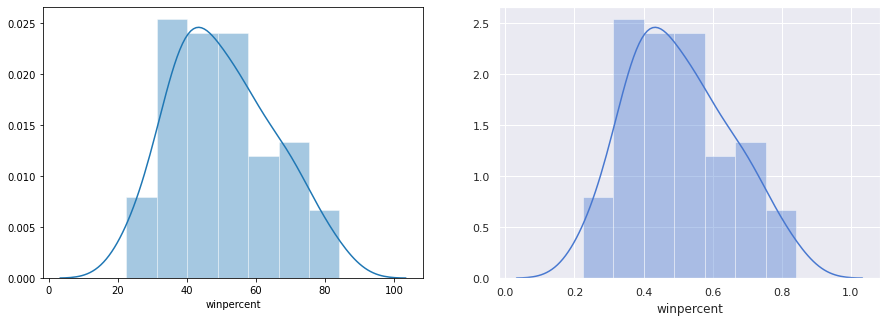

In [10]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))
plt.subplot(1,2,1)
sns.set(color_codes=True)                                                # Plot a histogram of the winpercent distribution
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_candy["winpercent"])
plt.subplot(1,2,2)
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))
df_candy['winpercent'] = df_candy['winpercent']/100
sns.distplot(df_candy['winpercent'])

2. Create 2 new variables sugarbyprice and winbyprice to analyse the sugary and popularity nature of the candies by price.  
* sugarbyprice: higher value means the candy is sweet as well as cheap.
* winbyprice: higher value means the candy is more liked as well as cheap.

In [11]:
df_candy['sugarbyprice'] = df_candy['sugarpercent'].div(df_candy['pricepercent']) # higher value means the candy is sweet as well as cheap.
df_candy['winbyprice'] = df_candy['winpercent'].div(df_candy['pricepercent']) # higher value means the candy is more liked as well as cheap.

In [12]:
df_candy.sample(5)

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
35                   Milk Duds          1       0        1               0   
7           Boston Baked Beans          0       0        0               1   
11  Chewey Lemonhead Fruit Mix          0       1        0               0   
37          Milky Way Midnight          1       0        1               0   
58                       Runts          0       1        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
35       0                 0     0    0         1         0.302         0.511   
7        0                 0     0    0         1         0.313         0.511   
11       0                 0     0    0         1         0.732         0.511   
37       1                 0     0    1         0         0.732         0.441   
58       0                 0     1    0         1         0.872         0.279   

    winpercent  sugarbyprice  winbyprice  
35     0.55064      0.590998    1.077573  
7      0.23418      0.612524    0.458278  
11     0.36018      1.432485    0.704853  
37     0.60801      1.659864    1.378707  
58     0.42849      3.125448    1.535806

In [13]:
#!pip install pandas-profiling==1.4.3
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 266kB 2.6MB/s 
     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 3.1MB 3.8MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 604kB 23.2MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 296kB 26.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=7ab7d908494bf37a788f9b22466cd9af83e462f224a54c42d6b854fee717fcb4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=e7053ebaaaecfd3d8d398b11c14734d94ff05dd5a5840c9e13372e0070558ac6
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [14]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(df_candy)

In [15]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
profile = df_candy.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file("candy_profiling_before_processing.html")   

# To output the pandas profiling report on the notebook.

df_candy.profile_report(title='Pandas Profiling before Data Preprocessing')

Observations:
* 1. Rows : 85
* 2. Columns: 15 (Bool:9, Num: 5, Cat: 1)
* 3. No Missing Values
* 4. Competitor Name has 85 unique values
* 5. Chocolate and Fruity are the popular compositions.
* 6. Pluribus has equal distribution on chocolates existing in a box.
* 7. sugarpercent and pricepercent has their mean and median almost closer to eachother, hence we infer that, they both are normally distributed.
* 8. winpercent has median slightly less than the mean, hence we infer that, winpercent is right skewed a little.

Since the data is fine, we can go ahead with the EDA.

<a id=section4></a> 
### 4. EDA on Candy dataset

<a id=section401></a> 
#### 4.1 What are the count of candies with each compositions?

In [16]:
def barplot(feature):
  sns.countplot(x=feature,data=df_candy)
  for d in [0, 1]:
    plt.text(d, (df_candy[feature] == d).sum(), str(round(((df_candy[feature] == d).sum())*100/(df_candy.shape[0]), 2)))

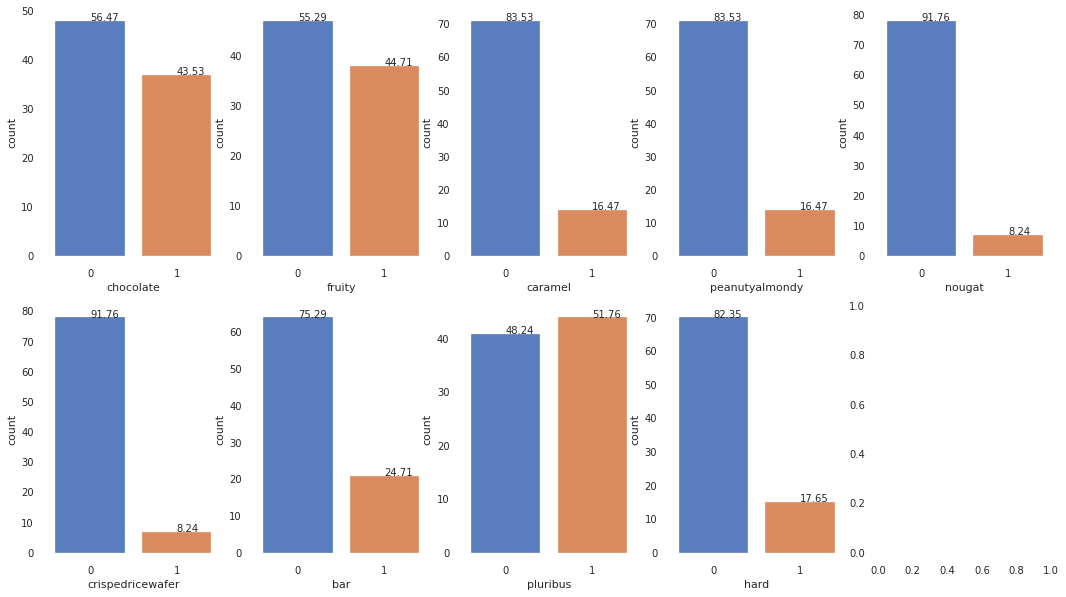

In [17]:
fig, ax = plt.subplots(2, 5,figsize=(18,10))
plt.subplot(2,5,1)
barplot('chocolate')
plt.subplot(2,5,2)
barplot('fruity')
plt.subplot(2,5,3)
barplot('caramel')
plt.subplot(2,5,4)
barplot('peanutyalmondy')
plt.subplot(2,5,5)
barplot('nougat')
plt.subplot(2,5,6)
barplot('crispedricewafer')
plt.subplot(2,5,7)
barplot('bar')
plt.subplot(2,5,8)
barplot('pluribus')
plt.subplot(2,5,9)
barplot('hard')

Inference:  
In the given 85 varieties of candies:
* 43.53% of them are chocolatey
* 44.71% of them are fruity 
* 51.76% of them are pluribus(from a box of candies)
* 82.35% of them are soft candies

<a id=section402></a> 
#### 4.2 Which are the top 10 most popular and least popular candies?

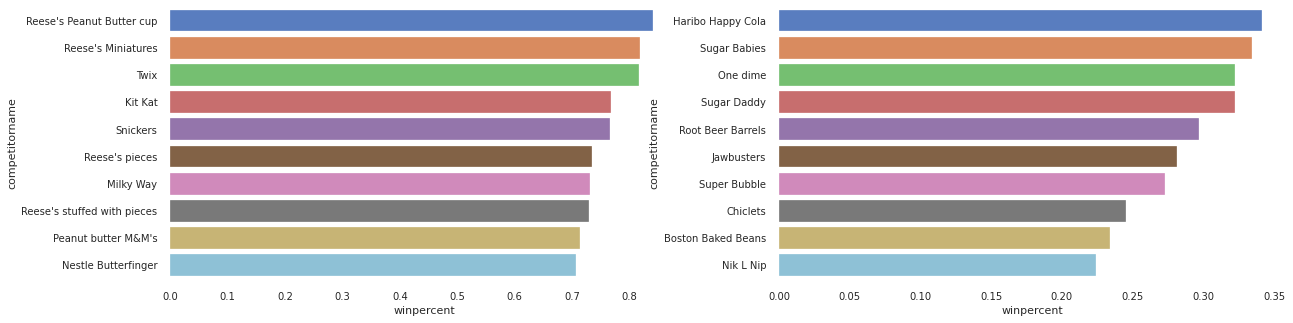

In [18]:
fig, ax = plt.subplots(1, 2,figsize=(20,5))
plt.subplot(1,2,1)
popular = df_candy.sort_values(by='winpercent', ascending = False)
sns.barplot(y='competitorname', x= 'winpercent', data=popular.head(10))
plt.subplot(1,2,2)
sns.barplot(y='competitorname', x= 'winpercent', data=popular.tail(10))

Inference:
* Reese's Peanut Butter cup, Miniatures and Twix are the most popular candies.  
* Nik L Nip, Boston Baked Beans and Chiclets are the least popular candies  
Lets see the compositions of the top 20 most popular candies and least popular candies.

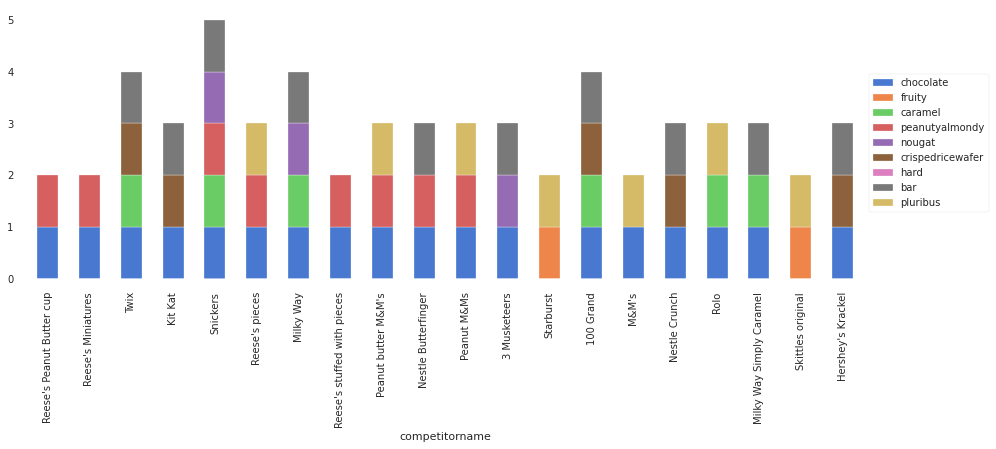

In [19]:
popular.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

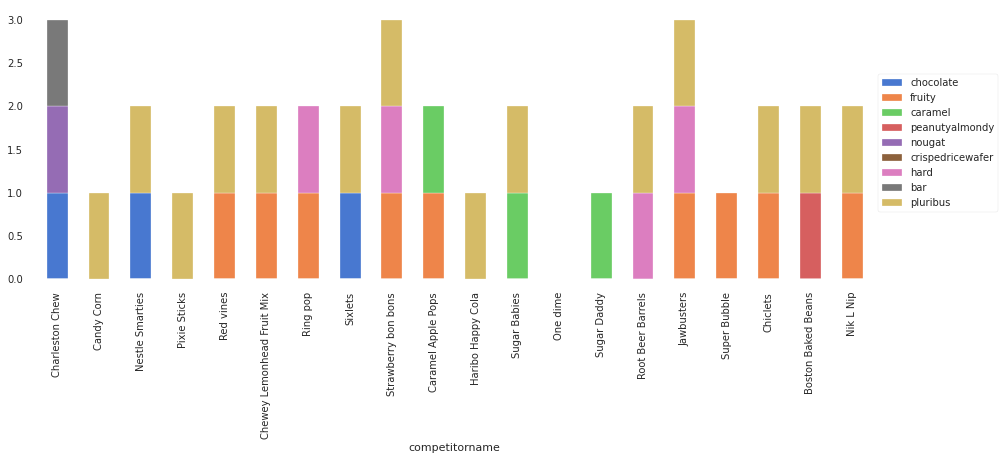

In [20]:
popular.iloc[:,:10].tail(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:
* Most of the top 20 popular candies are chocolatey, bar type and soft in texture and We find only fewer fruity, caramel, nougat, crispedricewafer, peanutyalmondy and pluribus type candies.
* Most of the top 20 least popular candies are pluribus type candies with a mixture of fruity compsition.

<a id=section403></a> 
#### 4.3 What are the top 20 candies that are not chocolatey but yet popular?

<Figure size 720x360 with 0 Axes>

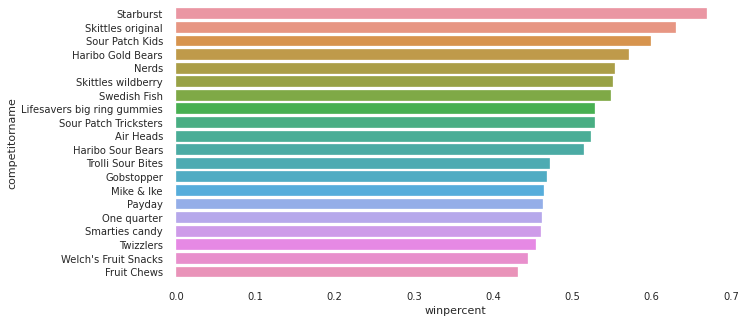

In [21]:
plt.figure(figsize=(10,5))
popular_nchoco = df_candy[df_candy['chocolate'] == 0].sort_values(by = 'winpercent', ascending = False)
sns.barplot(y='competitorname', x= 'winpercent', data=popular_nchoco.head(20))

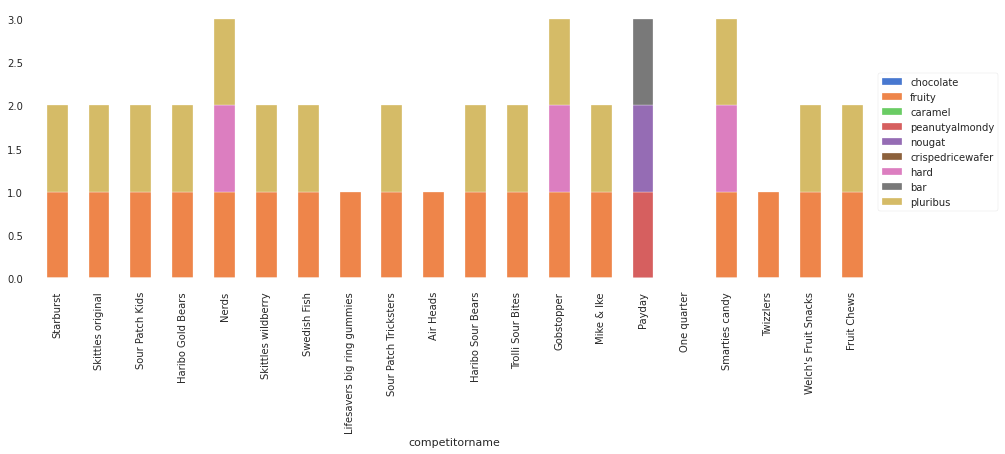

In [22]:
popular_nchoco.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:
* Starbust, Skittles original and Sour Patch kids candies tops the winning list which are not chocolatey.
* In the top 20 popular non chocolatey candies most of them are fruity and are of pluribus type.

<a id=section404></a> 
#### 4.4 Which are the top 20 costly candies?

<Figure size 720x360 with 0 Axes>

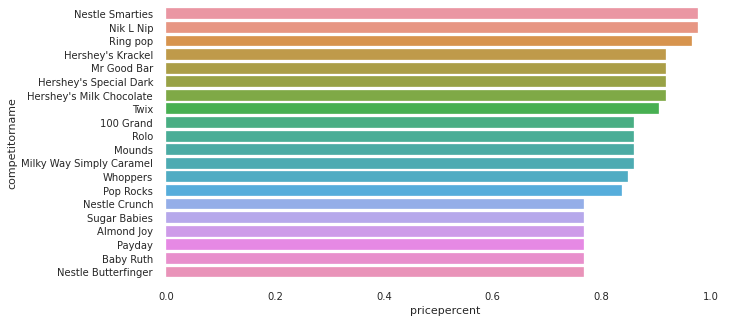

In [23]:
plt.figure(figsize= (10,5))
costly = df_candy.sort_values(by=['pricepercent'], ascending=False)
sns.barplot(y='competitorname', x= 'pricepercent', data= costly.head(20))

Inference:
* Nestle Smarties, Nik L Nip , Ring pop are the most costliest candies.  
Lets find out the compositions of these candies.

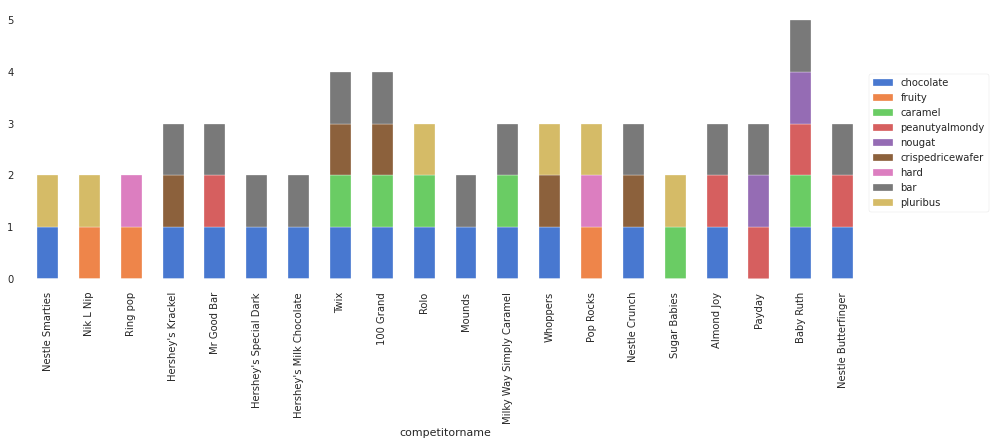

In [24]:
costly.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:  
* In the top 20 costly candies, we find that most of them are chocolatey and are of bar type.

<a id=section405></a> 
#### 4.5 What are the top 20 candies that are not chocolatey but yet costly?

<Figure size 720x360 with 0 Axes>

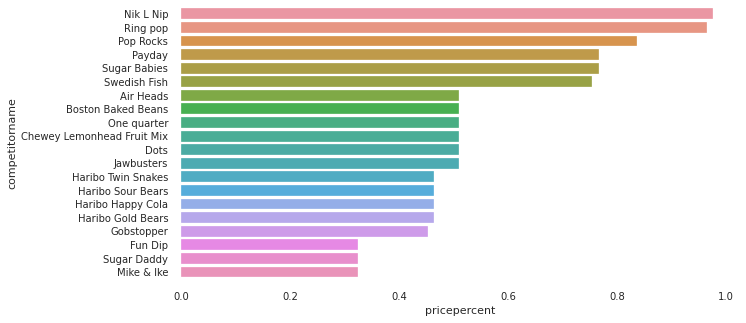

In [25]:
plt.figure(figsize=(10,5))
costly_nchoco = df_candy[df_candy['chocolate'] == 0].sort_values(by = 'pricepercent', ascending = False).head(20)
sns.barplot(y='competitorname', x= 'pricepercent', data= costly_nchoco)

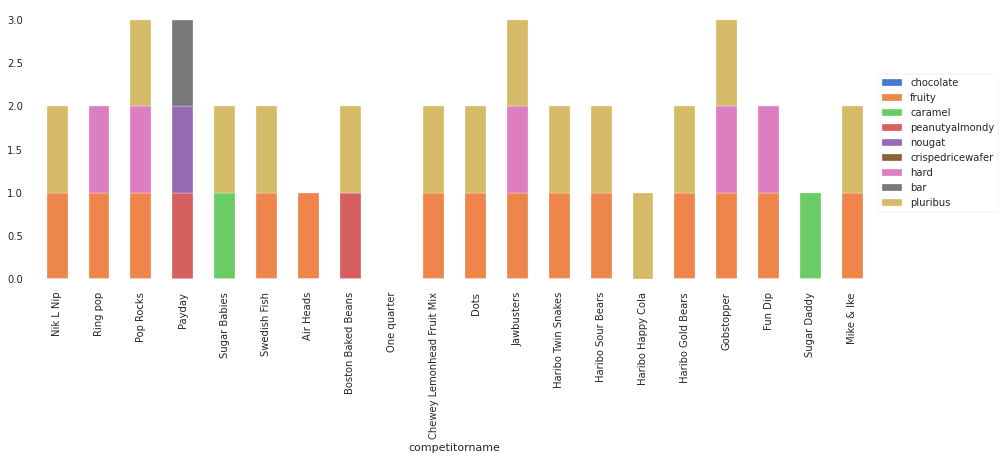

In [26]:
costly_nchoco.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:  
*  In the top 20 non chocolatey costly candies, we find that mostly they are fruity and are  of pluribus type.

<a id=section406></a> 
#### 4.6 Which are the top 20 sugary candies?

<Figure size 720x360 with 0 Axes>

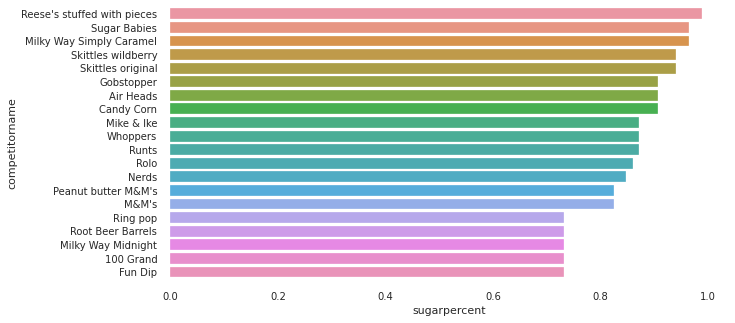

In [27]:
plt.figure(figsize=(10,5))
sugary = df_candy.sort_values(by=['sugarpercent'], ascending=False)
sns.barplot(y='competitorname', x= 'sugarpercent', data= sugary.head(20))

Inference:  
*  Reese's stuffed with pieces, Sugar Babies , Milky Way Simply Caramel are the top sugary candies.  
Lets find out the compositions of these candies.

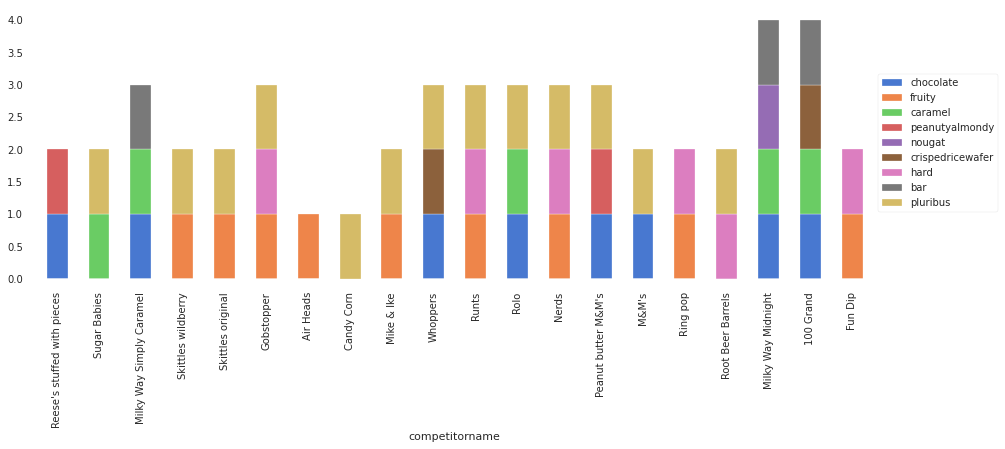

In [28]:
sugary.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:  
* In the top 20 sugary candies, most of them are either chocolatey or fruity and are of pluribus type.

<a id=section407></a> 
#### 4.7 How the candies compositions varies with winpercent?



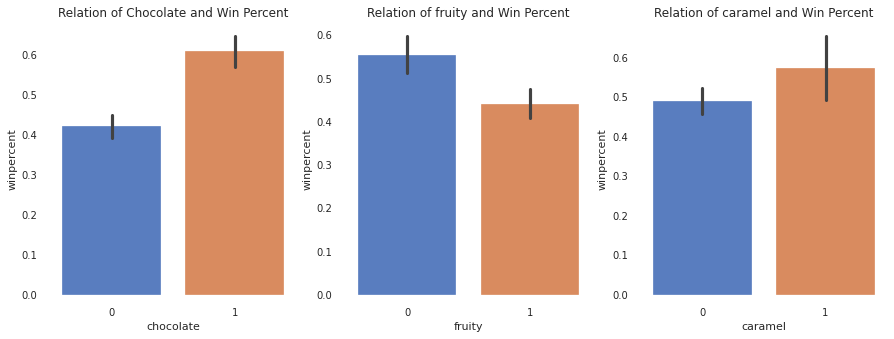

In [29]:
fig, ax = plt.subplots(1, 3,figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x="chocolate", y="winpercent", data=df_candy).set_title('Relation of Chocolate and Win Percent');
plt.subplot(1,3,2)
sns.barplot(x="fruity", y="winpercent", data=df_candy).set_title('Relation of fruity and Win Percent');
plt.subplot(1,3,3)
sns.barplot(x="caramel", y="winpercent", data=df_candy).set_title('Relation of caramel and Win Percent');

Inference:  
*  More than 60% of the population likes candies which are chocolatey.
*  More than 55% of the population likes candies which has caramel.
*  More than 55% of the population likes candies which are not fruity.

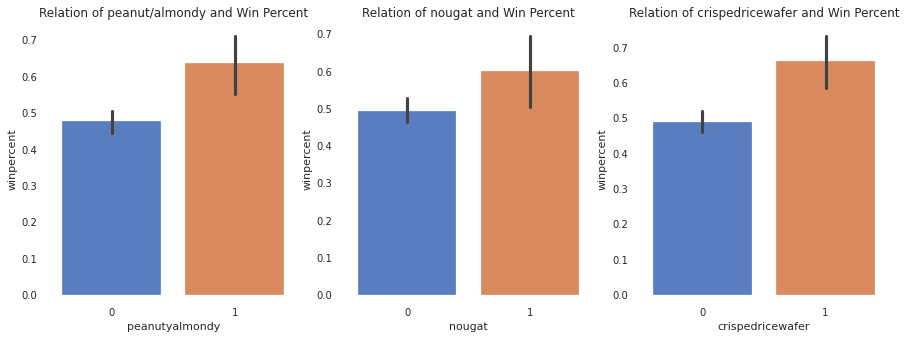

In [30]:
fig, ax = plt.subplots(1, 3,figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x="peanutyalmondy", y="winpercent", data=df_candy).set_title('Relation of peanut/almondy and Win Percent');
plt.subplot(1,3,2)
sns.barplot(x="nougat", y="winpercent", data=df_candy).set_title('Relation of nougat and Win Percent');
plt.subplot(1,3,3)
sns.barplot(x="crispedricewafer", y="winpercent", data=df_candy).set_title('Relation of crispedricewafer and Win Percent');

Inference:  
*  More than 60% of the poluation likes candies which have peanuts and almonds.
*  More than 60% of the popuation likes candies which are of nougats.
*  More than 60% of the population likes candies which are of crispedricewafer.

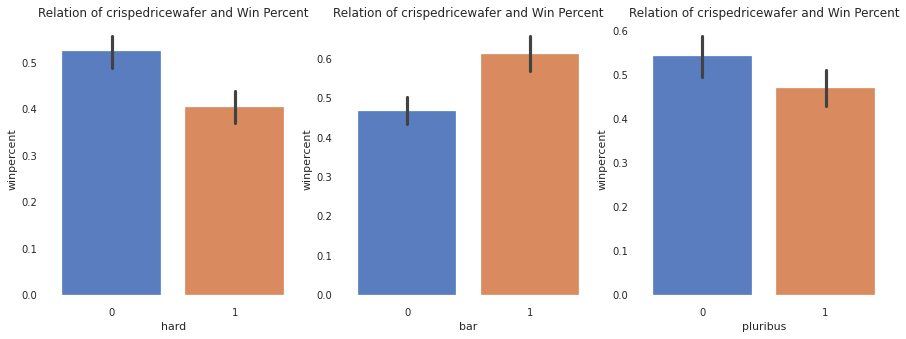

In [31]:
fig, ax = plt.subplots(1, 3,figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x="hard", y="winpercent", data=df_candy).set_title('Relation of crispedricewafer and Win Percent');
plt.subplot(1,3,2)
sns.barplot(x="bar", y="winpercent", data=df_candy).set_title('Relation of crispedricewafer and Win Percent');
plt.subplot(1,3,3)
sns.barplot(x="pluribus", y="winpercent", data=df_candy).set_title('Relation of crispedricewafer and Win Percent');

Inference:   
*  More than 60% of population likes bar type candies.
*  More than 40% of population likes hard type candies and which are from a box of candies(pluribus)

Conclusion:

In this question we conclude that, every composition in the candy addsup to the win percentage, hence we shall consider all the compositions for the machine learning algorithm.

<a id=section408></a> 
#### 4.8 How the sugarpercent and pricepercent varies with winpercent?

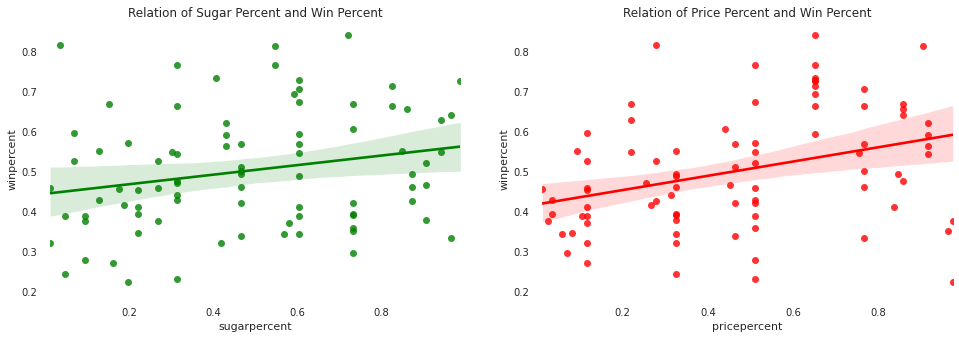

In [32]:
fig, ax = plt.subplots(1, 2,figsize=(25,5))
plt.subplot(1,3,1)
sns.regplot(x="sugarpercent", y="winpercent", data=df_candy, color='Green').set_title('Relation of Sugar Percent and Win Percent');
plt.subplot(1,3,2)
sns.regplot(x="pricepercent", y="winpercent", data=df_candy, color='Red').set_title('Relation of Price Percent and Win Percent');

Inference:  
All the data points are scattered in both the graphs hence:  
*  Sugar percent is very weakly correlated to win percent which means that the sugar content of candy doesn't contribute to the popularity of the candy.
*  Price percent is very weakly correlated to win percent which means that the cost of   
candy doesn't contribute to the popularity of the candy.

<a id=section409></a> 
#### 4.9 What are the top 20 candies that are popular and cheap?

<Figure size 720x360 with 0 Axes>

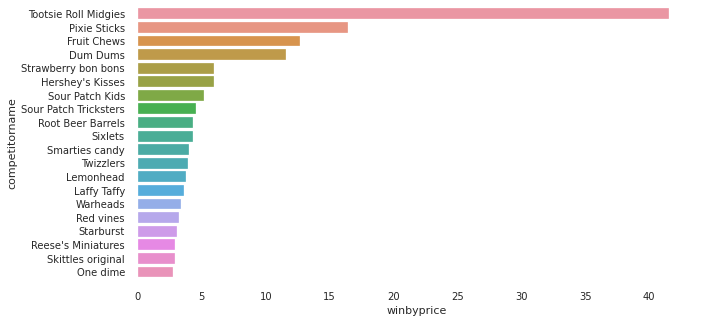

In [33]:
# We had created a new feature "winbyprice" whose values high means that the candy is popular as well as cheap.
plt.figure(figsize = (10,5))
popular_cheap = df_candy.sort_values(by = 'winbyprice', ascending = False)
sns.barplot(x = 'winbyprice', y = 'competitorname', data = popular_cheap.head(20))

Inference:  
*  Tootsie Roll Midgies seems to be the popular chocolatey candy which is cheap as well.  
Lets see the composition of these candies.

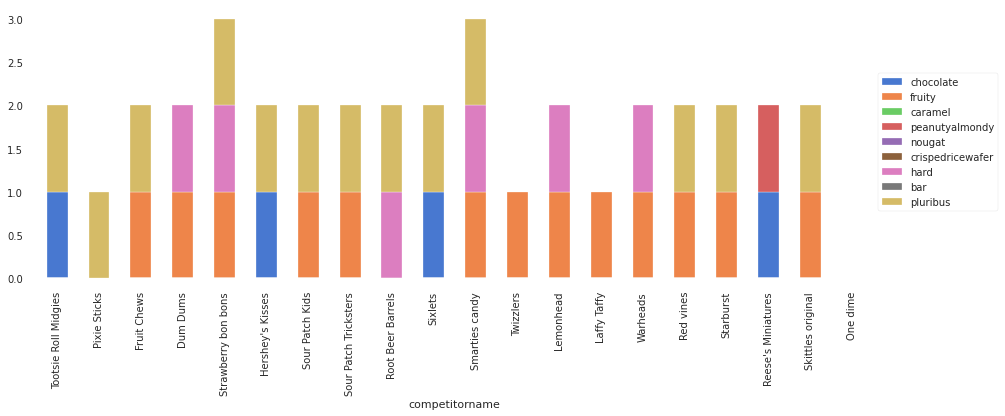

In [34]:
popular_cheap.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:  
* The top 20 popular and cheap candies, are mostly of fruity and pluribus type. 

<a id=section4010></a> 
#### 4.10 Which are the top 20 candies that are sugary and cheap?

<Figure size 720x360 with 0 Axes>

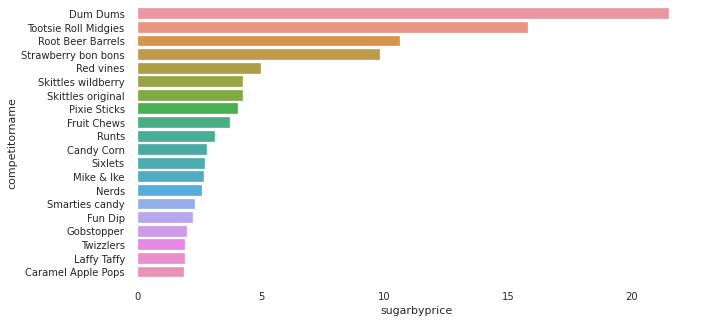

In [35]:
# We had created a new feature "sugarbyprice" whose values, high means that the candy is sugary as well as cheap.
plt.figure(figsize = (10,5))
sugary_cheap = df_candy.sort_values(by = 'sugarbyprice', ascending = False)
sns.barplot(x = 'sugarbyprice', y = 'competitorname', data = sugary_cheap.head(20))

Inference:  
*  Dum Dums, Tootsie Roll Midgies, Root Beer Barrels are the top sugary and cheap candies.  
Lets see the compositions of these candies

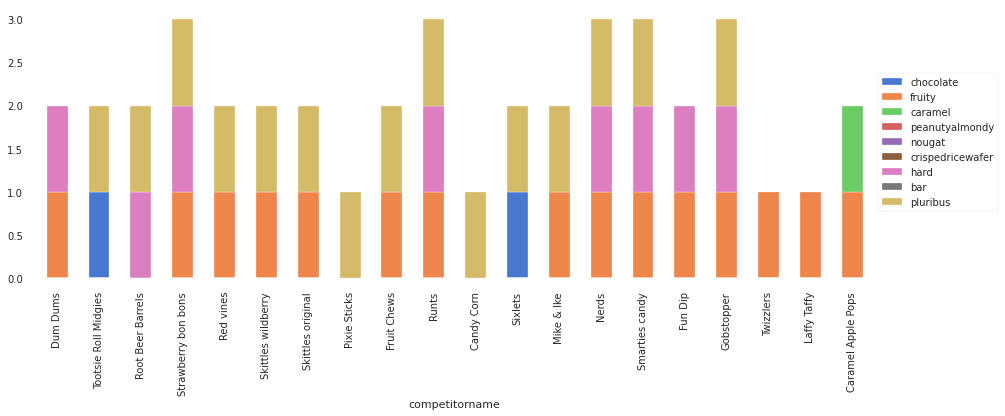

In [36]:
sugary_cheap.iloc[:,:10].head(20).plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:  
*  The top 20 sugary and cheap candies are mostly fruity and of pluribus type.

<a id=section4011></a> 
#### 4.11 What are the most frequently used compositions in the given candies?

(29, 10)

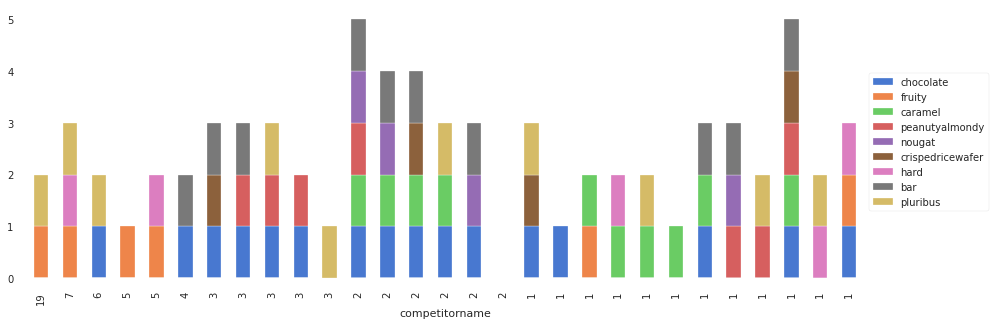

In [37]:
df_candy_cat = pd.DataFrame(df_candy.groupby(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus'])['competitorname'].count())
df_candy_cat = df_candy_cat.sort_values(by='competitorname', ascending=False)
df_candy_cat.reset_index(inplace=True)
df_candy_cat.shape
df_candy_cat.plot(kind='bar', x = 'competitorname', figsize = (15,5), stacked=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Inference:  
* Most frequently used combination of compositions in the 85 different candies are:
   *  Fruity and Pluribus
   *  Fruity, Hard and Pluribus
   *  Chocolate and bar

<a id=section4012></a> 
#### 4.12 What is the correlation of compositions in the candies?

<Figure size 1296x576 with 0 Axes>

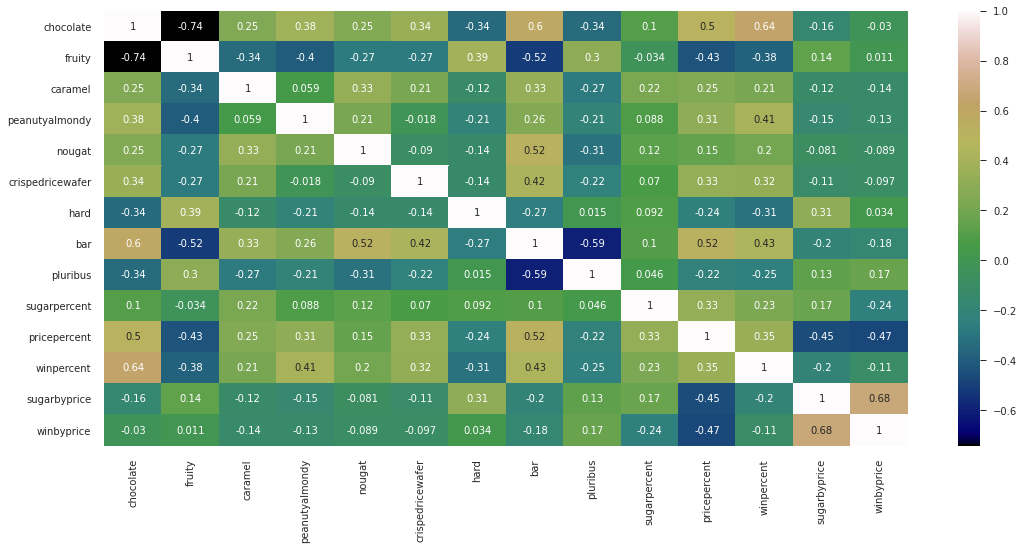

In [38]:
plt.figure(figsize = (18,8))        
sns.heatmap(df_candy.corr(),annot=True, cmap = 'gist_earth')

Inference:  
* Sugarbyprice and winbyprice are highly co-related (0.68). The more the candy is sweeter and cheaper, the more it is likely to be popular.
* Chocolate and winpercent are highly cor-related (0.64). The more the candy is chocolatey, the more it is likely to be popular.
* Chocolate and bar are highly correlated (0.6). Mostly the candies which are chocolatey are of bar type.
* Pricepercent and bar are medium correlated (0.52). Mostly the bar type candies are costlier than the other candies.
* Chocolatey and Fruity are negatively correlated (-0.74). Mostly Chocolatey candies does not have fruity composition.
* Bar and pluribus are negatively cor-related (-0.52). Mostly bar types candies are not of pluribus type(they are not from a box of candies)
* Bar and fruity are negatively cor-related (-0.52). Mostly bar types candies are not of fruity.

<a id=section4013></a> 
#### 4.13 Conclusions  from EDA of candy dataset:

1. In the given 85 varieties of candies:
    * 43.53% of them are chocolatey
    * 44.71% of them are fruity 
    * 51.76% of them are pluribus(from a box of candies)
    * 82.35% of them are soft candies
2. In the top 20 popular candies:
    * Reese's Peanut Butter cup, Miniatures and Twix are the most popular candies.  
    * Most of the candies are chocolatey, bar type and soft in texture.
3. In the top 20 non chocolatey popular candies:
    * Starbust, Skittles original and Sour Patch kids candies tops the winning list which are not chocolatey.
    * Most of the candies are fruity and are of pluribus type.
4. In the top 20 costly candies:
    * Nestle Smarties, Nik L Nip , Ring pop are the most costliest candies.  
    * Most of the candies are chocolatey and are of bar type. 
5. In the top 20 non chocolatey and costly candies:
    * Most of the candies are fruity and are of pluribus type.
6. In the top 20 sugary candies:
    * Reese's stuffed with pieces, Sugar Babies , Milky Way Simply Caramel are the top sugary candies.  
    * Most of the candies are either chocolatey or fruity and are of pluribus type.
7. In the top 20 candies which are popular and cheap:
    *  Tootsie Roll Midgies seems to be the popular chocolatey candy which is cheap as well.  
    * Most of the candies are fruity and are of pluribus type. 
8. In the top 20 candies which are sugary and cheap:
    * Dum Dums, Tootsie Roll Midgies, Root Beer Barrels are the top sugary and cheap candies.  
    * Mostly the candies are fruity and of pluribus type.
9. Sugar and Price percent relation with Winperecnt: 
    * Sugar percent is not linear to win percent which means that the sugar content of candy doesn't contribute to the popularity of the candy.
    * Price percent is not linear to win percent which means that the cost of   
candy doesn't contribute to the popularity of the candy.
10. Most frequently used combination of compositions in the 85 different candies are:
   *  Fruity and Pluribus
   *  Fruity, Hard and Pluribus
   *  Chocolate and bar
11. Cor-relation of the compositions of the candies:
   * Sugarbyprice and winbyprice are highly co-related (0.68). The more the candy is sweeter and cheaper, the more it is likely to be popular.
   * Chocolate and winpercent are highly cor-related (0.64). The more the candy is chocolatey, the more it is likely to be popular.
   * Chocolate and bar are highly correlated (0.6). Mostly the candies which are chocolatey are of bar type.
   * Pricepercent and bar are medium correlated (0.52). Mostly the bar type candies are costlier than the other candies.
   * Chocolatey and Fruity are negatively correlated (-0.74). Mostly Chocolatey candies does not have fruity composition.
   * Bar and pluribus are negatively cor-related (-0.52). Mostly bar types candies are not of pluribus type(they are not from a box of candies)
   * Bar and fruity are negatively cor-related (-0.52). Mostly bar types candies are not of fruity.
12. Every composition in the candy addsup to the win percentage, hence we shall consider all the compositions for the machine learning algorithm.


<a id=section5></a> 
### 5. Model Assumptions

1. Assumption: Target Variable should be normally distributed.

<Figure size 720x432 with 0 Axes>

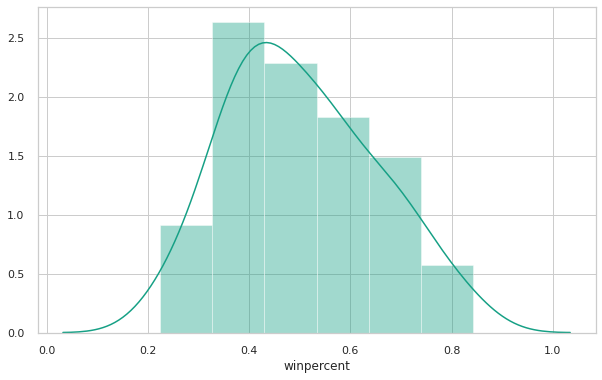

In [39]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1)
sns.distplot(df_candy['winpercent'],color='#16A085',bins=6)

Inference:
We see that the target variable winpercent is normally distributed. Assumption 1 is satisfied.

Assumption2: Linear Relation should be possible between Target Variable and Explanatory Variables:

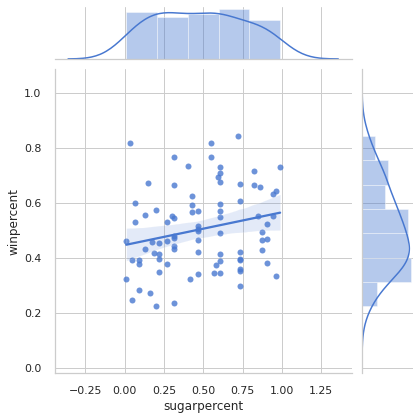

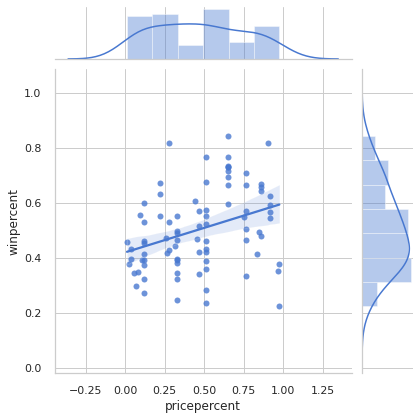

In [40]:
sns.jointplot("sugarpercent", "winpercent", data=df_candy, kind='reg')
sns.jointplot("pricepercent", "winpercent", data=df_candy, kind='reg')

Inference:  
We find that, all the 4 attributes sugarpercent, sugarbyprice, pricepercent, winbyprice are all linear but very weakly correlated with the target variable winpercent.

<a id=section6></a> 
### 6. Scaling of the Explanatory variables

In our candy dataset, all the compositions are categorical (1 or 0 - binary form) and sugarpercent, pricepercent in numerical continuos form (values btw 0-1), hence we need to scale the data before we predict for the winpercent of a candy.

In [41]:
df_candy_std = pd.DataFrame()
df_candy_modify = df_candy.drop(df_candy[['competitorname', 'winpercent', 'sugarbyprice', 'winbyprice']], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_candy_modify)
st = scaler.transform(df_candy_modify)
df_candy_std = pd.DataFrame(st, columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent'])   # code to transform the variables and standardize them
df_candy_std

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0    1.138990 -0.899172  2.251983       -0.444053 -0.299572          3.338092   
1    1.138990 -0.899172 -0.444053       -0.444053  3.338092         -0.299572   
2   -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
3   -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
4   -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   
..        ...       ...       ...             ...       ...               ...   
80  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   
81  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   
82  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   
83  -0.877971 -0.899172  2.251983       -0.444053 -0.299572         -0.299572   
84   1.138990 -0.899172 -0.444053       -0.444053 -0.299572          3.338092   

        hard       bar  pluribus  sugarpercent  pricepercent  
0  -0.462910  1.745743 -1.035940      0.901261      1.376914  
1  -0.462910  1.745743 -1.035940      0.445922      0.148273  
2  -0.462910 -0.572822 -1.035940     -1.663576     -1.242308  
3  -0.462910 -0.572822 -1.035940     -1.663576      0.148273  
4  -0.462910 -0.572822 -1.035940      1.520236      0.148273  
..       ...       ...       ...           ...           ...  
80 -0.462910 -0.572822 -1.035940     -0.920093     -1.242308  
81  2.160247 -0.572822 -1.035940     -1.371875     -1.242308  
82 -0.462910 -0.572822  0.965307     -0.589262     -0.548778  
83  2.160247 -0.572822 -1.035940     -1.041043     -0.710719  
84 -0.462910 -0.572822  0.965307      1.399287      1.334668  

[85 rows x 11 columns]

In [42]:
df_candy_std.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent'],
      dtype='object')

<a id=section7></a> 
### 7. Model Predictions

In the given explanatory variables in the dataset, since the sugarpercent and pricepercent were weakly correlated to the winpercent of a candy, I have divided the features for model predictions into 2 types, as given below and will be applying various regression models.  

Feature Type1: ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']  
Feature Type2: ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent','pricepercent']  

The possible regression models which can be applied as learnt from ML basics are:
1. Linear Regression
2. Decision Tree Regression
3. Pruned Decision Tree Regression
4. Decision Tree Regression with Grid SearchCV
5. Random Forest Regression
6. Parameterized Random Forest Regression
7. Random Forest Regression with Randomized SearchCV

<a id=section701></a> 
### 7.1 Model Predictions with Feature Type1

<a id=section70101></a> 
#### 7.1.1 Split X and Y variables

We need to segregate the dependent and independent variables tn order to apply the machine learning algorithms. Since sugarpercent and pricepercent are very weakly correlated, I am creating a feature list without these attributes. Later in the second part, I will include these variables and predict with different algorithms.

In [43]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']  
X = pd.DataFrame()
X = df_candy_std[feature_cols]# assign values of feature_cols to X
X.shape

(85, 9)

In [44]:
Y = pd.DataFrame()
Y = df_candy['winpercent']
Y.shape

(85,)

<a id=section70102></a> 
#### 7.1.2 Cross Validation

After processing the data, we need to split the data into train and test dataset. So that train data can be used to train the machine learning model and test data to test the model prediction.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1) # train test split using train test split of 70:30 and random state=1
# Shape of X and Y train dataset
print('X Train: ', X_train.shape)
print('Y Train: ', Y_train.shape)
# Shape of X and Y test dataset
print('X Test: ', X_test.shape)
print('Y Test: ', Y_test.shape)

X Train:  (59, 9)
Y Train:  (59,)
X Test:  (26, 9)
Y Test:  (26,)


<a id=section70103></a> 
#### 7.1.3 Instantiate and fit the Models

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #initiate the linear regression model to new variable linreg
linreg.fit(X_train,Y_train) # fit the X_train and y_train
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
  print(c1,c2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept 0.4941357442413667
chocolate 0.08934719800777627
fruity 0.03666949869196488
caramel -0.015614858347710233
peanutyalmondy 0.036204076589044794
nougat 0.026031510055806135
crispedricewafer 0.03736181537630803
hard -0.01626180589947602
bar -0.01591481659157419
pluribus -0.009732652310631064


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

[0.55784079 0.03155295 0.01568408 0.13754852 0.02339087 0.03062546
 0.01205264 0.12845744 0.06284726]


<Figure size 720x360 with 0 Axes>

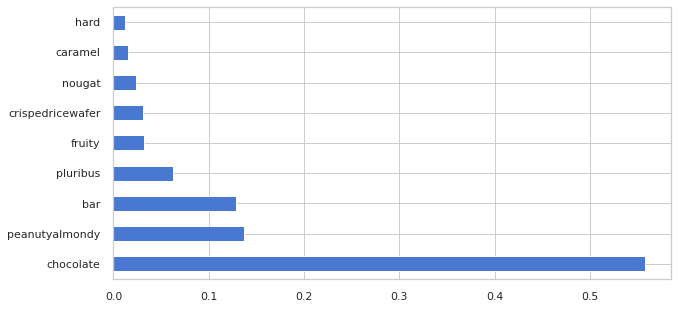

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=5)   #initiate the linear regression model to new variable linreg
dtree.fit(X_train,Y_train)  # fit the X_train and y_train
print(dtree.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

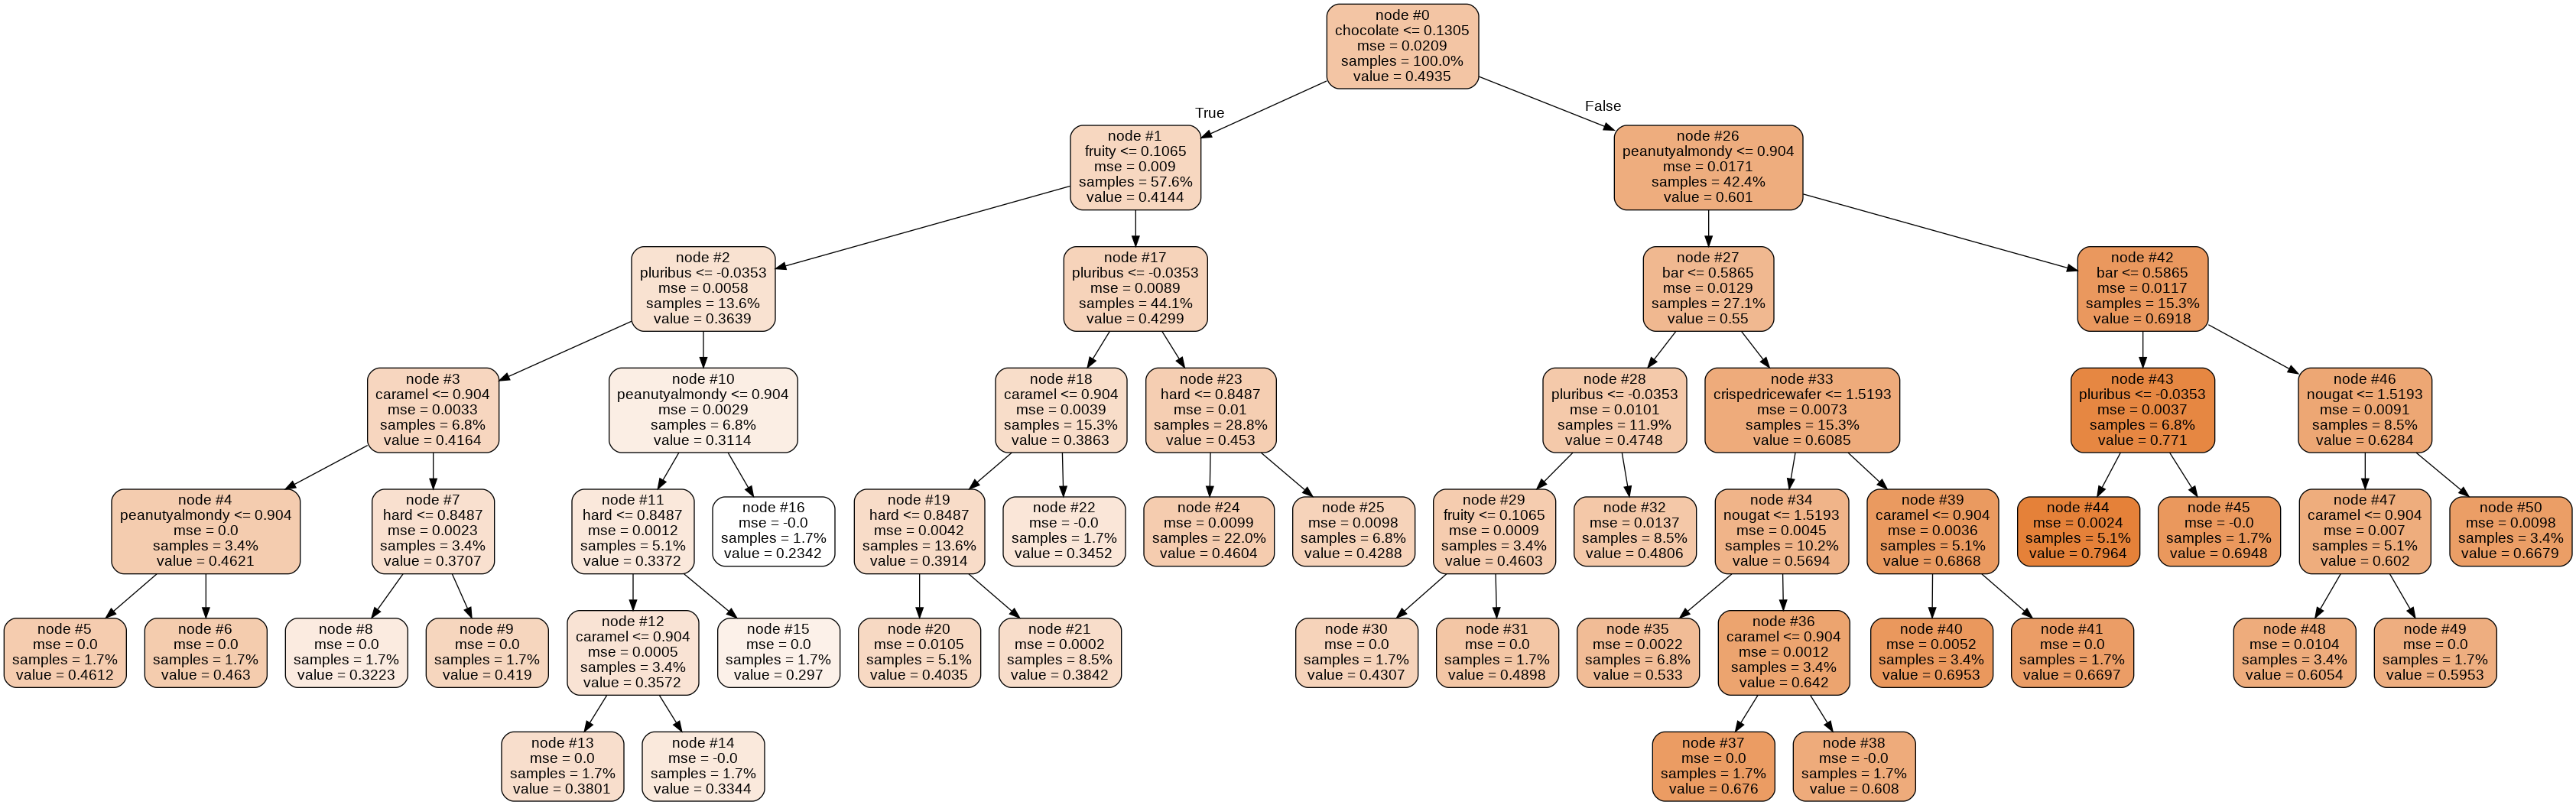

In [48]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

export_graphviz(dtree, 
                out_file='decision_tree.dot',
                feature_names= X.columns, 
                rounded=True, 
                precision=4, 
                node_ids=True, 
                proportion=True,
                filled=True)

(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')

Image(filename='decision_tree.png') 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

[0.57657581 0.03060422 0.01177491 0.14216621 0.00598547 0.03165401
 0.00350974 0.13277167 0.06495797]


<Figure size 720x360 with 0 Axes>

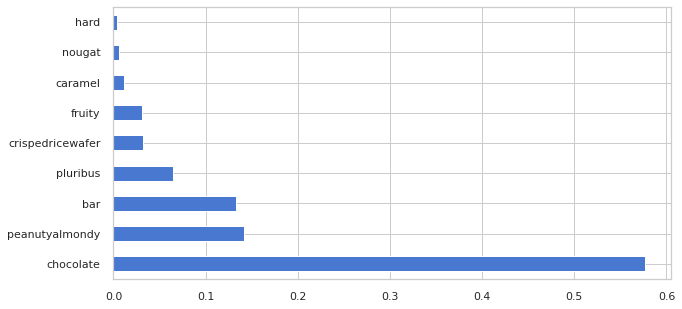

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtree_pr = DecisionTreeRegressor(criterion = 'mse', max_leaf_nodes=20, max_depth=4, random_state=5)   #initiate the linear regression model to new variable linreg
dtree_pr.fit(X_train,Y_train)  # fit the X_train and y_train
print(dtree_pr.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree_pr.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=5, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['mse', 'mae'], 'max_depth': range(2, 7),
                          'max_features': ['sqrt', 'log2', None],
                          'max_leaf_nodes': range(3, 20

[0.6005864  0.03187868 0.         0.13856838 0.         0.03297219
 0.         0.13830073 0.05769362]


<Figure size 720x360 with 0 Axes>

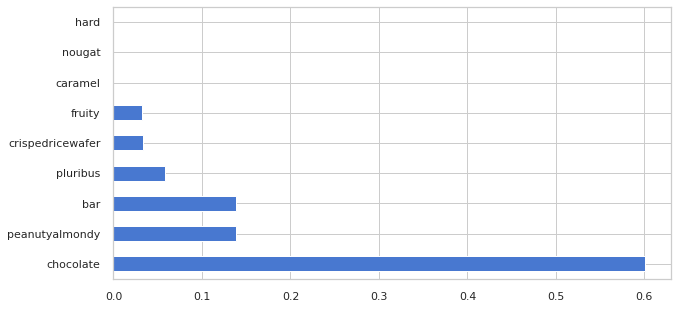

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree_reg = DecisionTreeRegressor(random_state = 5)
tree_para = [{'criterion':['mse','mae'],'max_depth': range(2,7),'max_features': ['sqrt', 'log2', None], 'max_leaf_nodes': range(3,20) }]     
dtree_reg_gs = GridSearchCV(dtree_reg,tree_para, cv=10, refit='AUC')
dtree_reg_gs.fit(X_train, Y_train)
print(dtree_reg_gs.best_estimator_.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree_reg_gs.best_estimator_.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

[0.49129338 0.03981406 0.03409503 0.15247287 0.03037627 0.04179534
 0.02866693 0.11599034 0.06549578]


<Figure size 720x360 with 0 Axes>

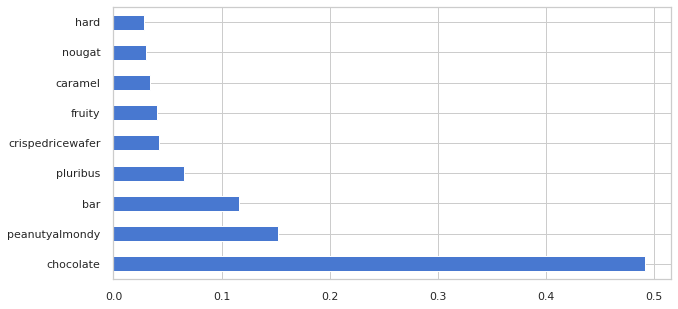

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(random_state=50)
seed = np.random.seed(22)
rfreg.fit(X_train,Y_train)
print(rfreg.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(rfreg.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

[0.45591341 0.04005615 0.03536182 0.17737754 0.02696202 0.04602977
 0.02927082 0.13124836 0.05778009]


<Figure size 720x360 with 0 Axes>

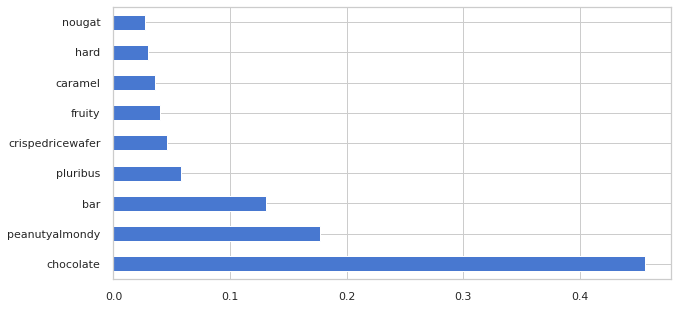

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfreg_pr = RandomForestRegressor(criterion='mse',n_estimators = 100, random_state = 0, max_depth = 7, max_leaf_nodes=20)
seed = np.random.seed(22)
rfreg_pr.fit(X_train,Y_train)
print(rfreg_pr.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(rfreg_pr.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

[0.40236443 0.06055731 0.02189786 0.19760149 0.01425181 0.04353829
 0.02420626 0.1644096  0.07117295]


<Figure size 720x360 with 0 Axes>

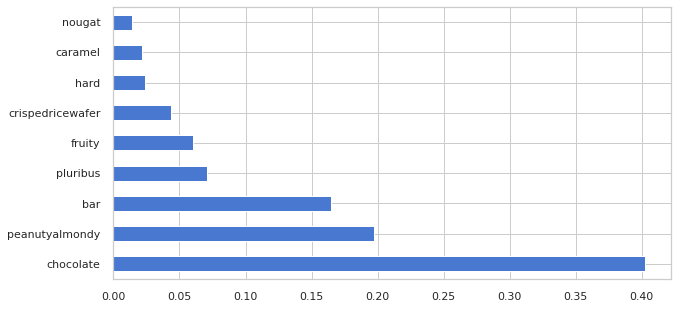

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfreg1 = RandomForestRegressor(n_estimators=100, random_state=50)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from

seed = np.random.seed(22)
param_dist = {"max_depth": range(2,7),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 18),
              "bootstrap": [True, False],
              "n_estimators": [50, 100, 150],
              "criterion" : ["mse", "mae"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
rf_reg_rs = RandomizedSearchCV(rfreg1, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)
rf_reg_rs.fit(X_train, Y_train)
print(rf_reg_rs.best_estimator_.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_reg_rs.best_estimator_.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

<a id=section70104></a> 
#### 7.1.4 Predict the Train and Test values

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

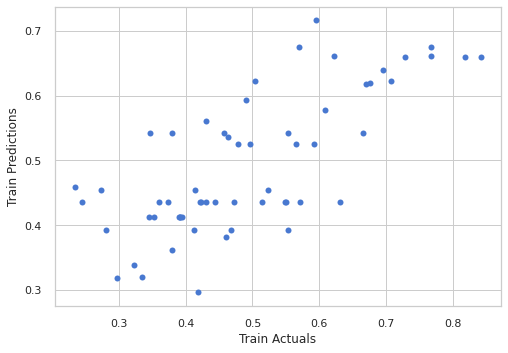

In [54]:
# Linear regression model prediction on train data.
pred_train = linreg.predict(X_train)
Y_pred_train = pd.DataFrame(pred_train)
Y_pred_train.columns = ['winpercent']
g=plt.plot(Y_train, Y_pred_train, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

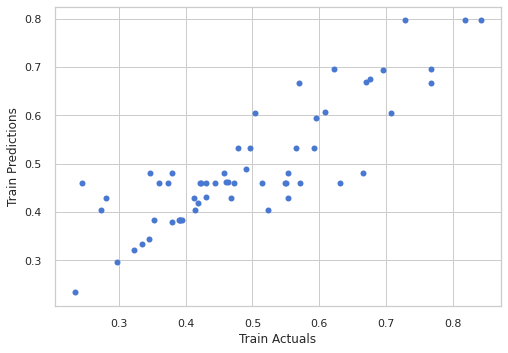

In [55]:
# Decision tree regression model prediction on train data.
pred_train_dt = dtree.predict(X_train)  
Y_pred_train_dt = pd.DataFrame(pred_train_dt)
Y_pred_train_dt.columns = ['winpercent']      
g=plt.plot(Y_train, Y_pred_train_dt, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

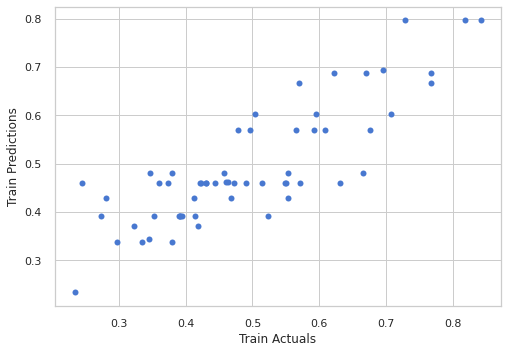

In [56]:
# Pruned decision tree regression model prediction on train data.
pred_train_dtpru = dtree_pr.predict(X_train)
Y_pred_train_dtpru = pd.DataFrame(pred_train_dtpru)
Y_pred_train_dtpru.columns = ['winpercent']
g=plt.plot(Y_train, Y_pred_train_dtpru, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

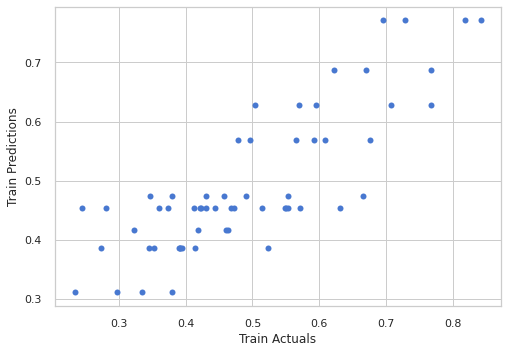

In [57]:
# Decision tree regression model with grid search prediction on train data.
pred_train_dt_gs = dtree_reg_gs.predict(X_train)
Y_pred_train_dt_gs = pd.DataFrame(pred_train_dt_gs)
Y_pred_train_dt_gs.columns = ['winpercent']
g=plt.plot(Y_train, Y_pred_train_dt_gs, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

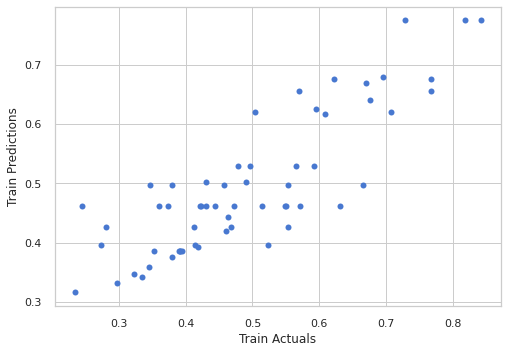

In [58]:
# Random forest regression model prediction on train data.
pred_train_rf = rfreg.predict(X_train)
Y_pred_train_rf = pd.DataFrame(pred_train_rf)
Y_pred_train_rf.columns = ['winpercent']
g=plt.plot(Y_train, Y_pred_train_rf, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

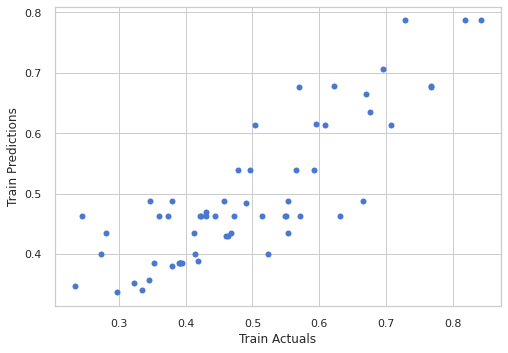

In [59]:
# Parametrized random forest regression model prediction on train data.
pred_train_rfpr = rfreg_pr.predict(X_train)
Y_pred_train_rfpr = pd.DataFrame(pred_train_rfpr)
Y_pred_train_rfpr.columns = ['winpercent']
g=plt.plot(Y_train, Y_pred_train_rfpr, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

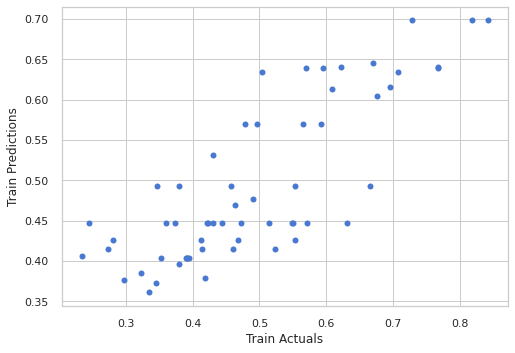

In [60]:
# Random forest regression with randomized search model prediction on train data.
pred_train_rf_rs = rf_reg_rs.predict(X_train)
Y_pred_train_rf_rs = pd.DataFrame(pred_train_rf_rs)
Y_pred_train_rf_rs.columns = ['winpercent']
g=plt.plot(Y_train, Y_pred_train_rf_rs, marker='o',linestyle='')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

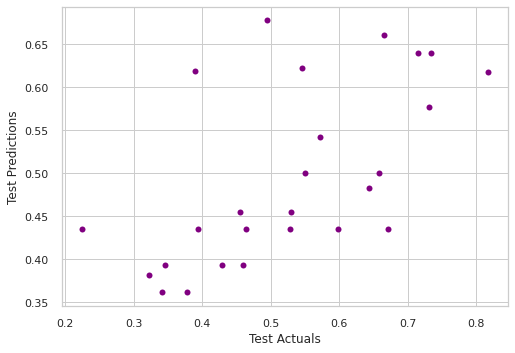

In [61]:
# Linear regression model prediction on test data
pred_test = linreg.predict(X_test)
Y_pred_test = pd.DataFrame(pred_test)
Y_pred_test.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

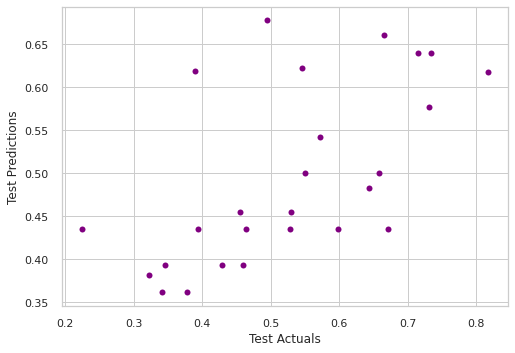

In [62]:
# Decision tree regression model prediction on test data.
pred_test_dt = dtree.predict(X_test)
Y_pred_test_dt = pd.DataFrame(pred_test_dt)
Y_pred_test_dt.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')
# Addition, Substraction, in big numbers like 100, 1000

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

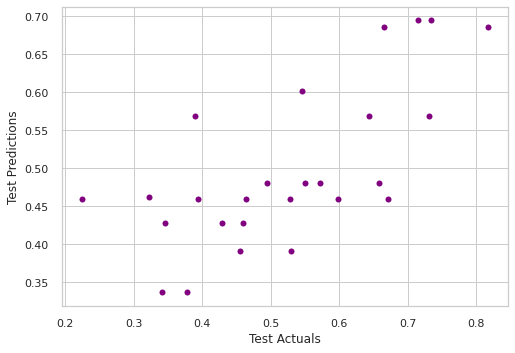

In [63]:
# Pruned decision tree regression model prediction on test data
pred_test_dtpru = dtree_pr.predict(X_test)
Y_pred_test_dtpru = pd.DataFrame(pred_test_dtpru)
Y_pred_test_dtpru.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_dtpru, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

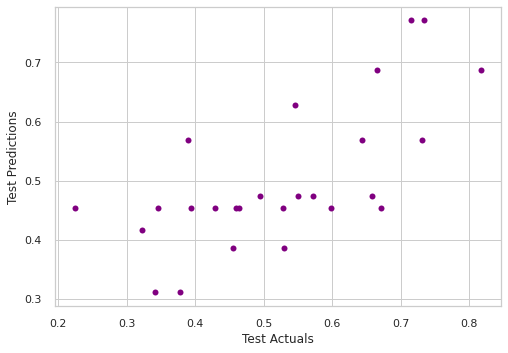

In [64]:
# Decision tree regression model with grid search prediction on test data.
pred_train_dt_gs = dtree_reg_gs.predict(X_train)
pred_test_dt_gs = dtree_reg_gs.predict(X_test)
Y_pred_test_dt_gs = pd.DataFrame(pred_test_dt_gs)
Y_pred_test_dt_gs.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_dt_gs, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

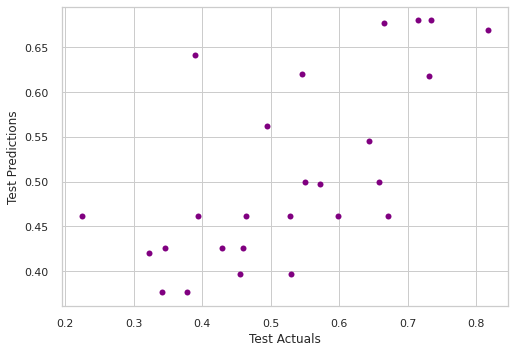

In [65]:
# Random forest regression model prediction with test data
pred_test_rf = rfreg.predict(X_test)
Y_pred_test_rf = pd.DataFrame(pred_test_rf)
Y_pred_test_rf.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_rf, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

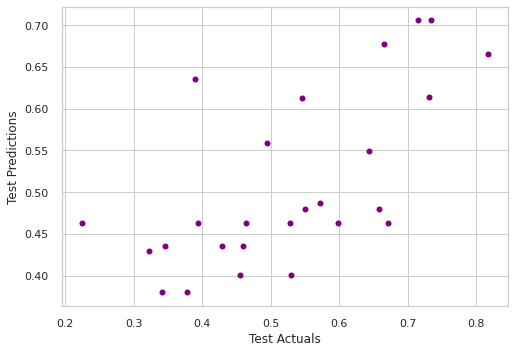

In [66]:
# Parameterized random forest regression model prediction with test data
pred_test_rfpr = rfreg_pr.predict(X_test)
Y_pred_test_rfpr = pd.DataFrame(pred_test_rfpr)
Y_pred_test_rfpr.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_rfpr, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

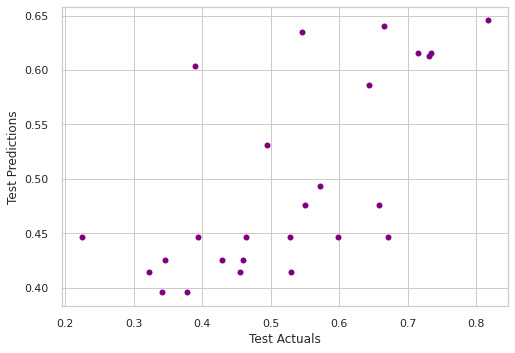

In [67]:
# Random forest regression with randomized search model prediction with test data
pred_test_rf_rs = rf_reg_rs.predict(X_test)
Y_pred_test_rf_rs = pd.DataFrame(pred_test_rf_rs)
Y_pred_test_rf_rs.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_rf_rs, marker='o',linestyle='', color = 'purple')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

<a id=section70105></a> 
#### 7.1.5 Evaluation of the models

In [68]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train))# Calculate RMSE for train 
RMSE_test = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test))# Calculate RMSE for test 
print('Linear Regression RMSE Train: ', RMSE_train) # print RMSE for train
print('Linear Regression RMSE Test: ', RMSE_test) # print RMSE for test

RMSE_train_dt = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_dt))# Calculate RMSE for train 
RMSE_test_dt = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_dt))# Calculate RMSE for test 
print('Decision Tree Regression RMSE Train: ', RMSE_train_dt) # print RMSE for train
print('Decision Tree Regression RMSE Test: ', RMSE_test_dt) # print RMSE for test

RMSE_train_dtpru = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_dtpru))# Calculate RMSE for train 
RMSE_test_dtpru = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_dtpru))# Calculate RMSE for test 
print('Pruned Decision Tree Regression RMSE Train: ', RMSE_train_dtpru) # print RMSE for train
print('Pruned Decision Tree Regression RMSE Test: ', RMSE_test_dtpru) # print RMSE for test

RMSE_train_dtgs = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_dt_gs))# Calculate RMSE for train 
RMSE_test_dtgs = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_dt_gs))# Calculate RMSE for test 
print('Decision Tree Regression with Grid Search RMSE Train: ', RMSE_train_dtgs) # print RMSE for train
print('Decision Tree Regression with Grid Search RMSE Test: ', RMSE_test_dtgs) # print RMSE for test

RMSE_train_rf = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_rf))# Calculate RMSE for train 
RMSE_test_rf = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_rf))# Calculate RMSE for test 
print('Random Forest Regression RMSE Train: ', RMSE_train_rf) # print RMSE for train
print('Random Forest Regression RMSE Test: ', RMSE_test_rf) # print RMSE for test

RMSE_train_rfpr = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_rfpr))# Calculate RMSE for train 
RMSE_test_rfpr = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_rfpr))# Calculate RMSE for test 
print('Parameterized Random Forest Regression RMSE Train: ', RMSE_train_rfpr) # print RMSE for train
print('Parameterized Random Forest Regression RMSE Test: ', RMSE_test_rfpr) # print RMSE for test

RMSE_train_rf_rs = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_rf_rs))# Calculate RMSE for train 
RMSE_test_rf_rs = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_rf_rs))# Calculate RMSE for test 
print('Random Forest Regression with randomized search RMSE Train: ', RMSE_train_rf_rs) # print RMSE for train
print('Random Forest Regression with randomized search RMSE Test: ', RMSE_test_rf_rs) # print RMSE for test

RMSE_train_feat1 = [RMSE_train, RMSE_train_dt, RMSE_train_dtpru, RMSE_train_dtgs, RMSE_train_rf, RMSE_train_rfpr, RMSE_train_rf_rs]
RMSE_test_feat1 = [RMSE_test, RMSE_test_dt, RMSE_test_dtpru, RMSE_test_dtgs, RMSE_test_rf, RMSE_test_rfpr, RMSE_test_rf_rs]


Linear Regression RMSE Train:  0.09870020289493994
Linear Regression RMSE Test:  0.12065976271291609
Decision Tree Regression RMSE Train:  0.07537687265892971
Decision Tree Regression RMSE Test:  0.11714746951290601
Pruned Decision Tree Regression RMSE Train:  0.07859589248229891
Pruned Decision Tree Regression RMSE Test:  0.10933155980744028
Decision Tree Regression with Grid Search RMSE Train:  0.08226368048577182
Decision Tree Regression with Grid Search RMSE Test:  0.1114106159666506
Random Forest Regression RMSE Train:  0.07802771988788054
Random Forest Regression RMSE Test:  0.11114250897852535
Parameterized Random Forest Regression RMSE Train:  0.07804155302107757
Parameterized Random Forest Regression RMSE Test:  0.11221161209768175
Random Forest Regression with randomized search RMSE Train:  0.08772038286345334
Random Forest Regression with randomized search RMSE Test:  0.11391190280121312


<a id=section702></a> 
### 7.2 Model Prediction with Feature Type 2

<a id=section70201></a> 
#### 7.2.1 Split X and Y attributes

In [69]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']  
X = pd.DataFrame()
X = df_candy_std[feature_cols]# assign values of feature_cols to X
X.shape

(85, 11)

In [70]:
Y = pd.DataFrame()
Y = df_candy['winpercent']
Y.shape

(85,)

<a id=section70202></a> 
#### 7.2.2 Cross Validation for Feature Type2

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1) # train test split using train test split of 70:30 and random state=1
# Shape of X and Y train dataset
print('X Train: ', X_train.shape)
print('Y Train: ', Y_train.shape)
# Shape of X and Y test dataset
print('X Test: ', X_test.shape)
print('Y Test: ', Y_test.shape)

X Train:  (59, 11)
Y Train:  (59,)
X Test:  (26, 11)
Y Test:  (26,)


<a id=section70203></a> 
#### 7.2.3 Instantiate and fit the Models

In [72]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #initiate the linear regression model to new variable linreg
linreg.fit(X_train,Y_train) # fit the X_train and y_train
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
  print(c1,c2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept 0.4902244712230173
chocolate 0.08789674467097208
fruity 0.029198597064913425
caramel -0.024122831885403876
peanutyalmondy 0.03193730390943365
nougat 0.024252706713957132
crispedricewafer 0.03735867893886812
hard -0.020045352152211524
bar -0.019320738179873873
pluribus -0.018982831220513852
sugarpercent 0.041467707291055735
pricepercent -0.004756450495641996


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

[0.41207996 0.04648361 0.01203179 0.09507584 0.         0.03193823
 0.02434189 0.03804324 0.01517672 0.25953334 0.0652954 ]


<Figure size 720x360 with 0 Axes>

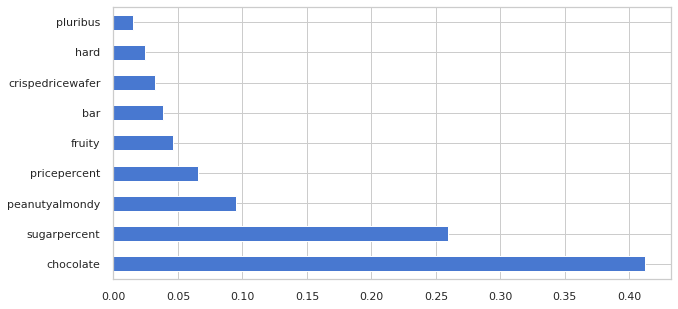

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=5)   #initiate the linear regression model to new variable linreg
dtree.fit(X_train,Y_train)  # fit the X_train and y_train
print(dtree.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

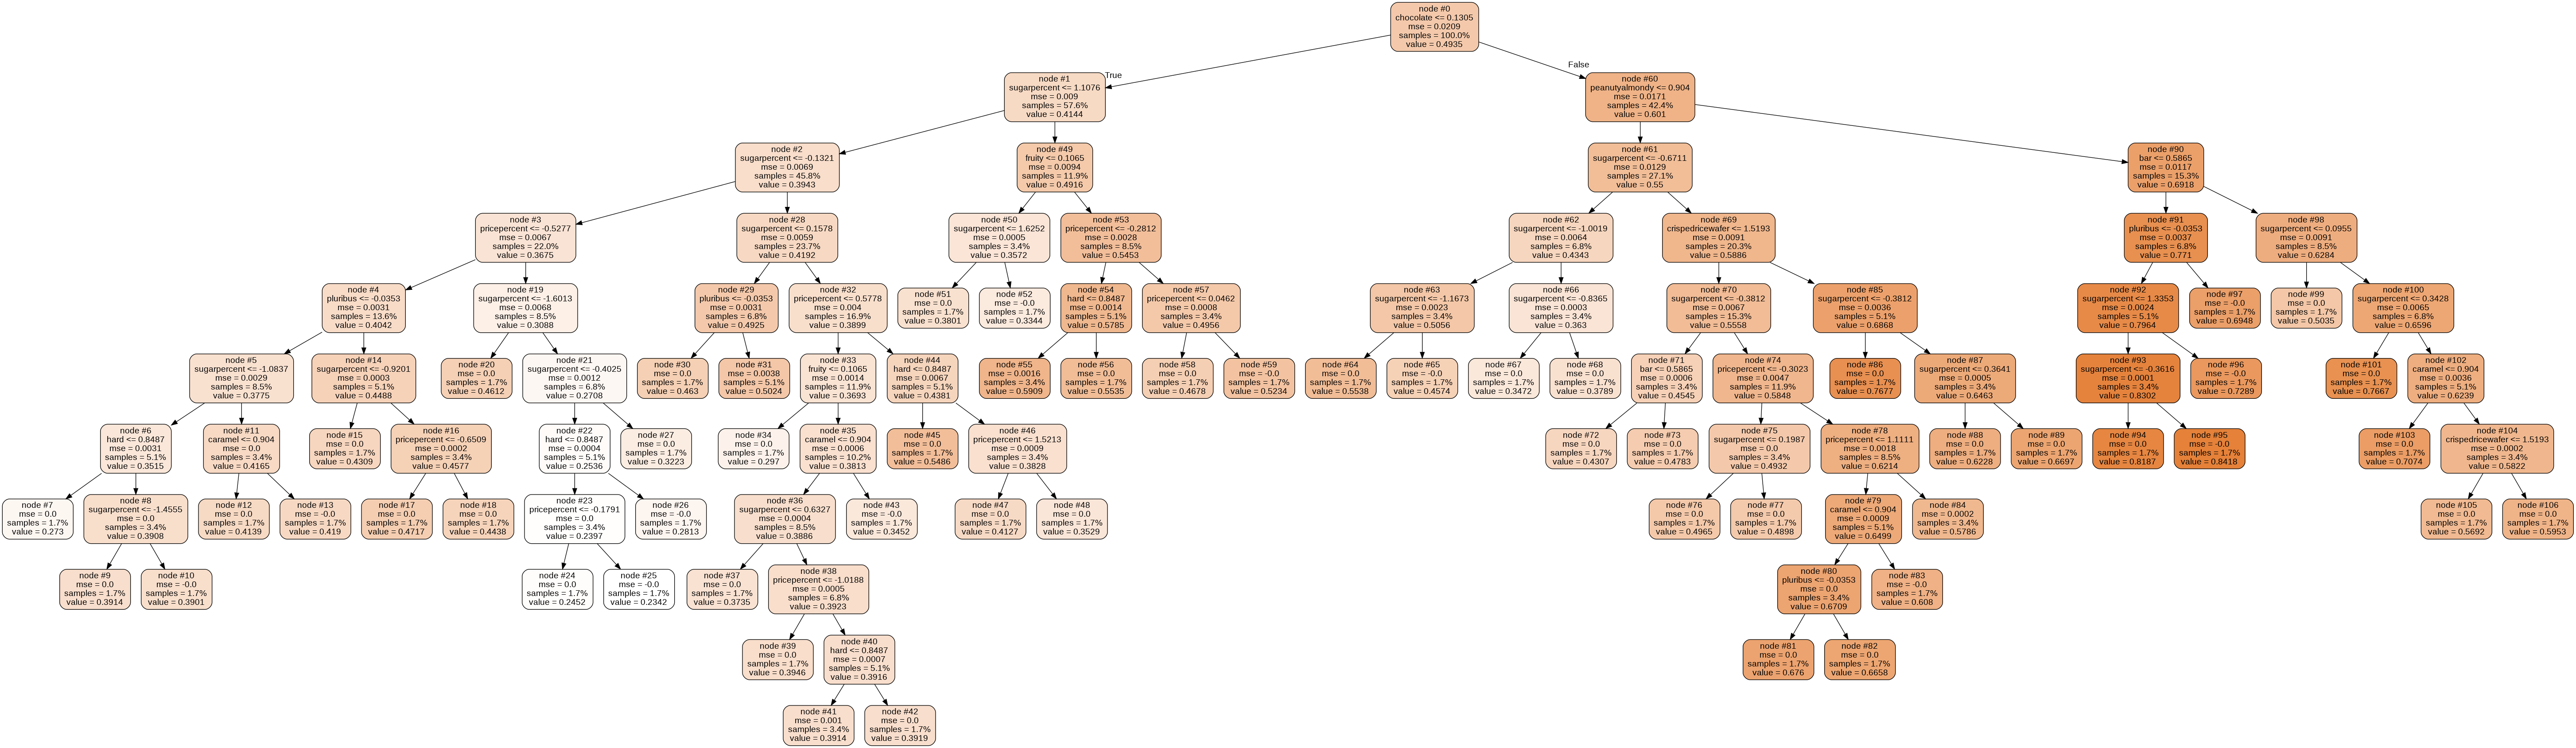

In [74]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

export_graphviz(dtree, 
                out_file='decision_tree.dot',
                feature_names= X.columns, 
                rounded=True, 
                precision=4, 
                node_ids=True, 
                proportion=True,
                filled=True)

(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')

Image(filename='decision_tree.png') 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

[0.44627574 0.04492621 0.00928052 0.10296555 0.         0.03428486
 0.01629595 0.04019271 0.         0.25117815 0.05460031]


<Figure size 720x360 with 0 Axes>

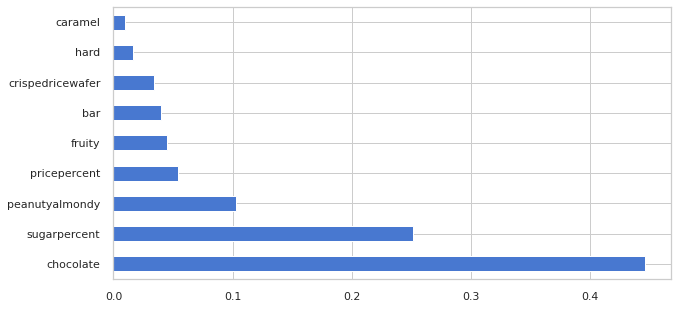

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtree_pr = DecisionTreeRegressor(criterion = 'mse', max_leaf_nodes=20, max_depth=7, random_state=5)   #initiate the linear regression model to new variable linreg
dtree_pr.fit(X_train,Y_train)  # fit the X_train and y_train
print(dtree_pr.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree_pr.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=5, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['mse', 'mae'], 'max_depth': range(2, 7),
                          'max_features': ['sqrt', 'log2', None],
                          'max_leaf_nodes': range(3, 20

[0.46647009 0.02234955 0.         0.30889341 0.00180937 0.03407999
 0.         0.08703972 0.         0.01875058 0.06060729]


<Figure size 720x360 with 0 Axes>

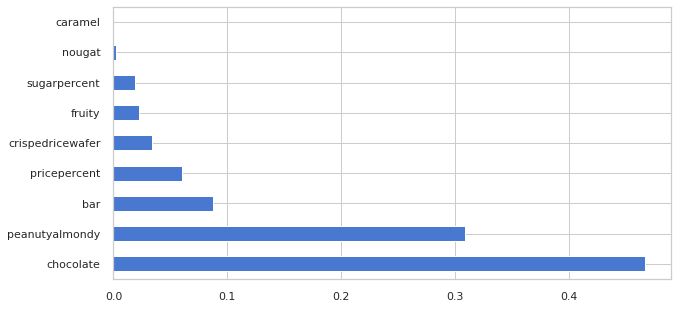

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree_reg = DecisionTreeRegressor(random_state = 5)
tree_para = [{'criterion':['mse','mae'],'max_depth': range(2,7),'max_features': ['sqrt', 'log2', None], 'max_leaf_nodes': range(3,20) }]     
dtree_reg_gs = GridSearchCV(dtree_reg,tree_para, cv=10, refit='AUC')
dtree_reg_gs.fit(X_train, Y_train)
print(dtree_reg_gs.best_estimator_.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree_reg_gs.best_estimator_.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

[0.3877924  0.03352255 0.02055205 0.07385265 0.00482904 0.02215506
 0.01407125 0.0577159  0.02341048 0.23402097 0.12807763]


<Figure size 720x360 with 0 Axes>

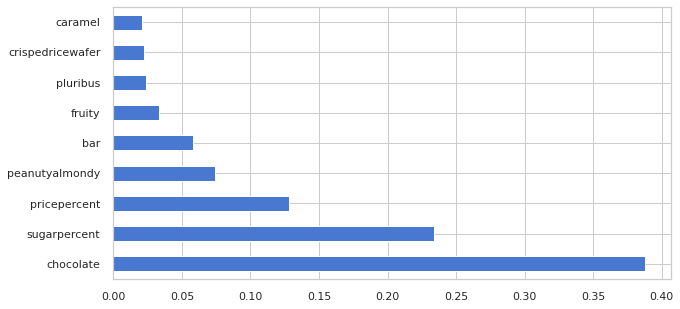

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(random_state=50)
seed = np.random.seed(22)
rfreg.fit(X_train,Y_train)
print(rfreg.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(rfreg.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

[0.39532326 0.03038828 0.02172231 0.07554173 0.0043302  0.02238184
 0.01628208 0.0593324  0.02046121 0.22900901 0.12522769]


<Figure size 720x360 with 0 Axes>

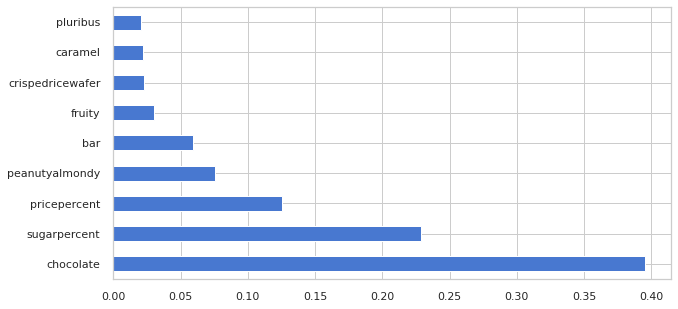

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfreg_pr = RandomForestRegressor(criterion='mse',n_estimators = 100, random_state = 50, max_depth = 7, max_leaf_nodes=20)
seed = np.random.seed(22)
rfreg_pr.fit(X_train,Y_train)
print(rfreg_pr.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(rfreg_pr.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=200,
                           

[0.28738393 0.05289032 0.01705231 0.14232162 0.00992485 0.04459762
 0.02001895 0.12671898 0.03521007 0.13472533 0.12915602]


<Figure size 720x360 with 0 Axes>

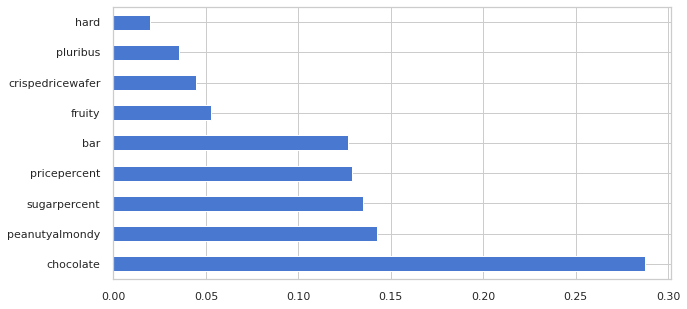

In [79]:
from sklearn.ensemble import RandomForestRegressor
rfreg1 = RandomForestRegressor(n_estimators = 200, random_state=50)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from

seed = np.random.seed(22)
param_dist = {"max_depth": range(3,7),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 18),
              "bootstrap": [True, False],
              "n_estimators": [50, 100, 150],
              "criterion" : ["mse"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
rf_reg_rs = RandomizedSearchCV(rfreg1, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)
rf_reg_rs.fit(X_train, Y_train)
print(rf_reg_rs.best_estimator_.feature_importances_)            #plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_reg_rs.best_estimator_.feature_importances_, index=feature_cols[1:])
plt.figure(figsize=(10,5))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

<a id=section70204></a> 
#### 7.2.4 Predict the Train and Test values

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

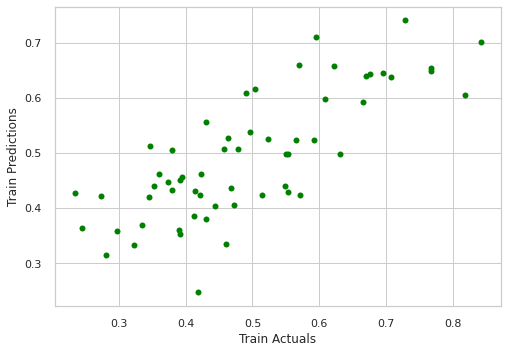

In [80]:
# Linear regression model prediction on train data.
pred_train = linreg.predict(X_train)
Y_pred_train = pd.DataFrame(pred_train)
Y_pred_train.columns = ['winpercent']
plt.plot(Y_train, Y_pred_train, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

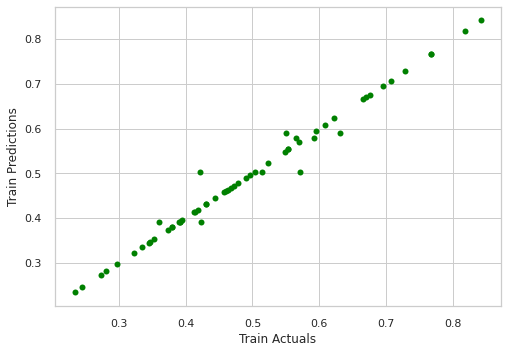

In [81]:
# Decision tree regression model prediction on train data.
pred_train_dt = dtree.predict(X_train)  
Y_pred_train_dt = pd.DataFrame(pred_train_dt)
Y_pred_train_dt.columns = ['winpercent']      
plt.plot(Y_train, Y_pred_train_dt, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

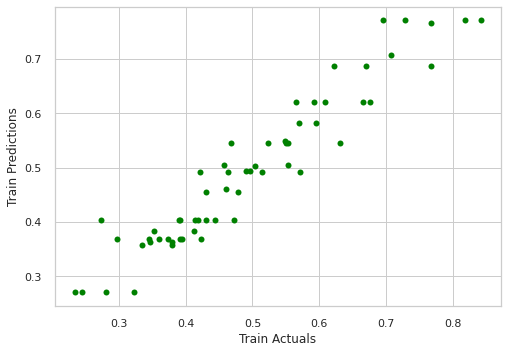

In [82]:
# Pruned decision tree regression model prediction on train data.
pred_train_dtpru = dtree_pr.predict(X_train)
Y_pred_train_dtpru = pd.DataFrame(pred_train_dtpru)
Y_pred_train_dtpru.columns = ['winpercent']
plt.plot(Y_train, Y_pred_train_dtpru, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

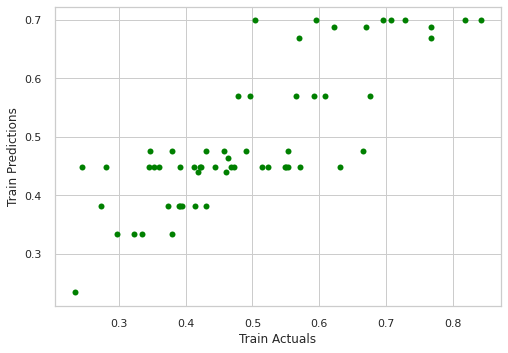

In [83]:
# Decision tree regression model with grid search prediction on train data.
pred_train_dt_gs = dtree_reg_gs.predict(X_train)
Y_pred_train_dt_gs = pd.DataFrame(pred_train_dt_gs)
Y_pred_train_dt_gs.columns = ['winpercent']
plt.plot(Y_train, Y_pred_train_dt_gs, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

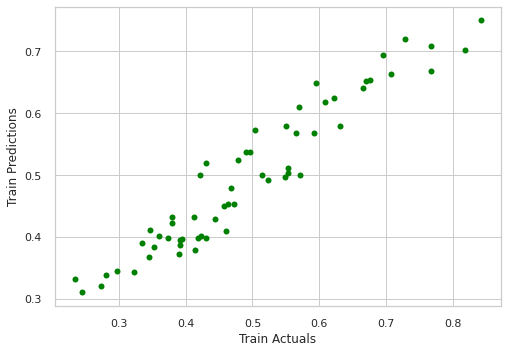

In [84]:
# Random forest regression model prediction on train data.
pred_train_rf = rfreg.predict(X_train)
Y_pred_train_rf = pd.DataFrame(pred_train_rf)
Y_pred_train_rf.columns = ['winpercent']
plt.plot(Y_train, Y_pred_train_rf, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

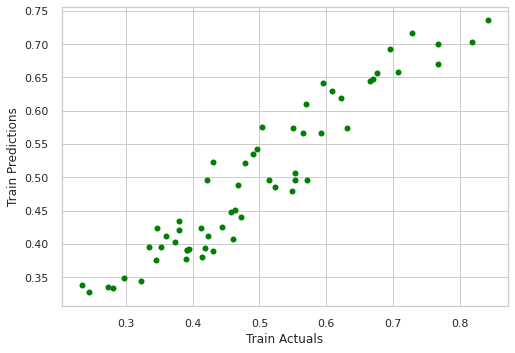

In [85]:
# Parametrized random forest regression model prediction on train data.
pred_train_rfpr = rfreg_pr.predict(X_train)
Y_pred_train_rfpr = pd.DataFrame(pred_train_rfpr)
Y_pred_train_rfpr.columns = ['winpercent']
plt.plot(Y_train, Y_pred_train_rfpr, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Train Actuals')

Text(0, 0.5, 'Train Predictions')

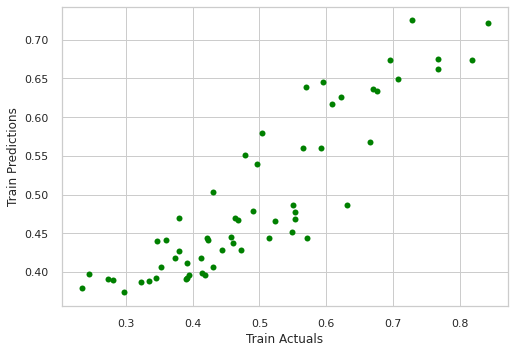

In [86]:
# Random forest regression with randomized search model prediction on train data.
pred_train_rf_rs = rf_reg_rs.predict(X_train)
Y_pred_train_rf_rs = pd.DataFrame(pred_train_rf_rs)
Y_pred_train_rf_rs.columns = ['winpercent']
plt.plot(Y_train, Y_pred_train_rf_rs, marker='o',linestyle='', color = 'green')
plt.xlabel('Train Actuals')
plt.ylabel('Train Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

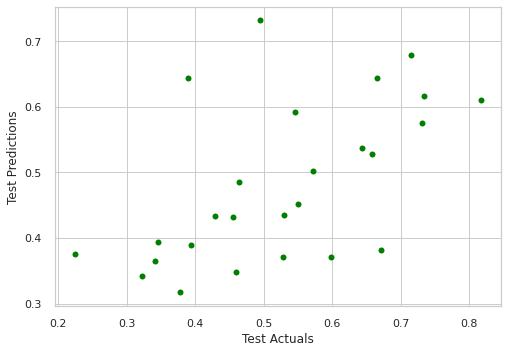

In [87]:
# Linear regression model prediction on test data
pred_test = linreg.predict(X_test)
Y_pred_test = pd.DataFrame(pred_test)
Y_pred_test.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

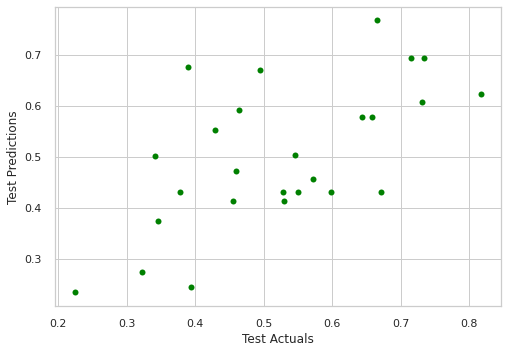

In [88]:
# Decision tree regression model prediction on test data.
pred_test_dt = dtree.predict(X_test)
Y_pred_test_dt = pd.DataFrame(pred_test_dt)
Y_pred_test_dt.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_dt, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

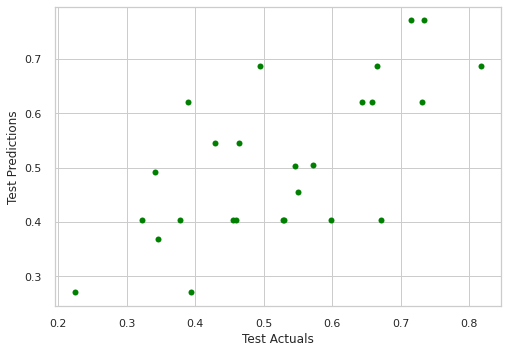

In [89]:
# Pruned decision tree regression model prediction on test data
pred_test_dtpru = dtree_pr.predict(X_test)
Y_pred_test_dtpru = pd.DataFrame(pred_test_dtpru)
Y_pred_test_dtpru.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_dtpru, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

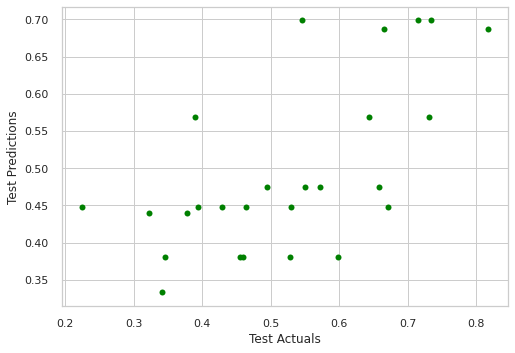

In [90]:
# Decision tree regression model with grid search prediction on test data.
pred_train_dt_gs = dtree_reg_gs.predict(X_train)
pred_test_dt_gs = dtree_reg_gs.predict(X_test)
Y_pred_test_dt_gs = pd.DataFrame(pred_test_dt_gs)
Y_pred_test_dt_gs.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_dt_gs, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

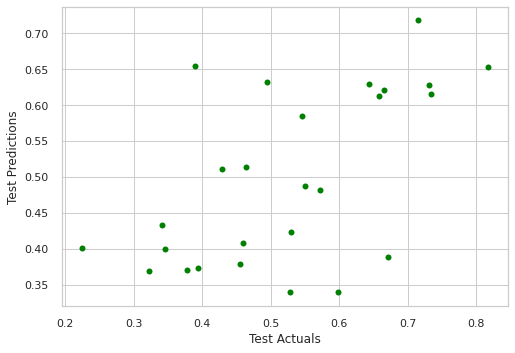

In [91]:
# Random forest regression model prediction with test data
pred_test_rf = rfreg.predict(X_test)
Y_pred_test_rf = pd.DataFrame(pred_test_rf)
Y_pred_test_rf.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_rf, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

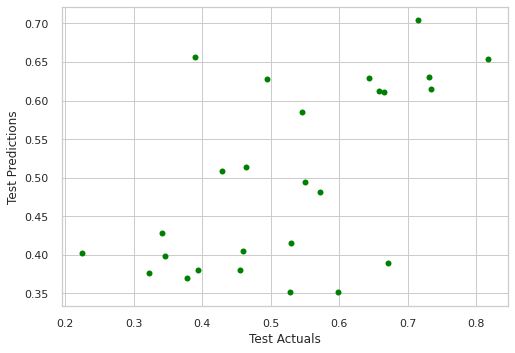

In [92]:
# Parameterized random forest regression model prediction with test data
pred_test_rfpr = rfreg_pr.predict(X_test)
Y_pred_test_rfpr = pd.DataFrame(pred_test_rfpr)
Y_pred_test_rfpr.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_rfpr, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

Text(0.5, 0, 'Test Actuals')

Text(0, 0.5, 'Test Predictions')

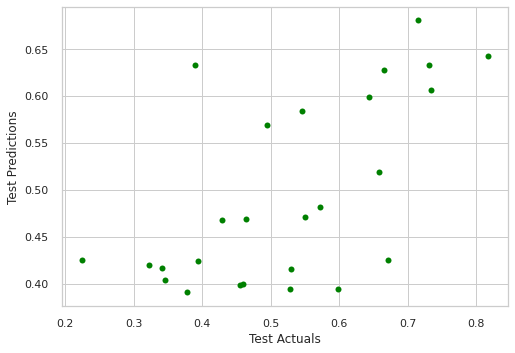

In [93]:
# Random forest regression with randomized search model prediction with test data
pred_test_rf_rs = rf_reg_rs.predict(X_test)
Y_pred_test_rf_rs = pd.DataFrame(pred_test_rf_rs)
Y_pred_test_rf_rs.columns = ['winpercent']
plt.plot(Y_test, Y_pred_test_rf_rs, marker='o',linestyle='', color = 'green')
plt.xlabel('Test Actuals')
plt.ylabel('Test Predictions')

<a id=section70205></a> 
#### 7.2.5 Evaluate the model

In [94]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train))# Calculate RMSE for train 
RMSE_test = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test))# Calculate RMSE for test 
print('Linear Regression RMSE Train: ', RMSE_train) # print RMSE for train
print('Linear Regression RMSE Test: ', RMSE_test) # print RMSE for test

RMSE_train_dt = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_dt))# Calculate RMSE for train 
RMSE_test_dt = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_dt))# Calculate RMSE for test 
print('Decision Tree Regression RMSE Train: ', RMSE_train_dt) # print RMSE for train
print('Decision Tree Regression RMSE Test: ', RMSE_test_dt) # print RMSE for test

RMSE_train_dtpru = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_dtpru))# Calculate RMSE for train 
RMSE_test_dtpru = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_dtpru))# Calculate RMSE for test 
print('Pruned Decision Tree Regression RMSE Train: ', RMSE_train_dtpru) # print RMSE for train
print('Pruned Decision Tree Regression RMSE Test: ', RMSE_test_dtpru) # print RMSE for test

RMSE_train_dtgs = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_dt_gs))# Calculate RMSE for train 
RMSE_test_dtgs = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_dt_gs))# Calculate RMSE for test 
print('Decision Tree Regression with Grid Search RMSE Train: ', RMSE_train_dtgs) # print RMSE for train
print('Decision Tree Regression with Grid Search RMSE Test: ', RMSE_test_dtgs) # print RMSE for test

RMSE_train_rf = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_rf))# Calculate RMSE for train 
RMSE_test_rf = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_rf))# Calculate RMSE for test 
print('Random Forest Regression RMSE Train: ', RMSE_train_rf) # print RMSE for train
print('Random Forest Regression RMSE Test: ', RMSE_test_rf) # print RMSE for test

RMSE_train_rfpr = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_rfpr))# Calculate RMSE for train 
RMSE_test_rfpr = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_rfpr))# Calculate RMSE for test 
print('Parameterized Random Forest Regression RMSE Train: ', RMSE_train_rfpr) # print RMSE for train
print('Parameterized Random Forest Regression RMSE Test: ', RMSE_test_rfpr) # print RMSE for test

RMSE_train_rf_rs = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_rf_rs))# Calculate RMSE for train 
RMSE_test_rf_rs = np.sqrt( metrics.mean_squared_error(Y_test, Y_pred_test_rf_rs))# Calculate RMSE for test 
print('Random Forest Regression with randomized search RMSE Train: ', RMSE_train_rf_rs) # print RMSE for train
print('Random Forest Regression with randomized search RMSE Test: ', RMSE_test_rf_rs) # print RMSE for test

RMSE_train_feat2 = [RMSE_train, RMSE_train_dt, RMSE_train_dtpru, RMSE_train_dtgs, RMSE_train_rf, RMSE_train_rfpr, RMSE_train_rf_rs]
RMSE_test_feat2 = [RMSE_test, RMSE_test_dt, RMSE_test_dtpru, RMSE_test_dtgs, RMSE_test_rf, RMSE_test_rfpr, RMSE_test_rf_rs]

Linear Regression RMSE Train:  0.09127864274856436
Linear Regression RMSE Test:  0.13280661984864608
Decision Tree Regression RMSE Train:  0.016917528218299182
Decision Tree Regression RMSE Test:  0.1260867290453129
Pruned Decision Tree Regression RMSE Train:  0.04322530127633331
Pruned Decision Tree Regression RMSE Test:  0.11685794861436652
Decision Tree Regression with Grid Search RMSE Train:  0.08501677649685421
Decision Tree Regression with Grid Search RMSE Test:  0.11838631131885885
Random Forest Regression RMSE Train:  0.047079436914812194
Random Forest Regression RMSE Test:  0.12622469977018486
Parameterized Random Forest Regression RMSE Train:  0.050597140304309604
Parameterized Random Forest Regression RMSE Test:  0.12462328226378945
Random Forest Regression with randomized search RMSE Train:  0.07026001285108738
Random Forest Regression with randomized search RMSE Test:  0.11784432031986106


<a id=section8></a> 
### 8. Plotting the evaluation metrics of different models

1. Comparing RMSE (Root ean Squared Error) values of models applied on the first set of feature columns.

   * Features List1: chocolate, fruity, caramel, peanutyalmondy,nougat, crispedricewafer, hard, bar, pluribus 
   * Target Variable: winpercent

In [95]:
models = ['Linear_Reg', 'Decision_Tree', 'Pruned_Decision_Tree', 'Grid_Search_Decision_Tree', 'Random_Forest', 'Parameterized_Random_Forest', 'Random_Search_Random Forest']

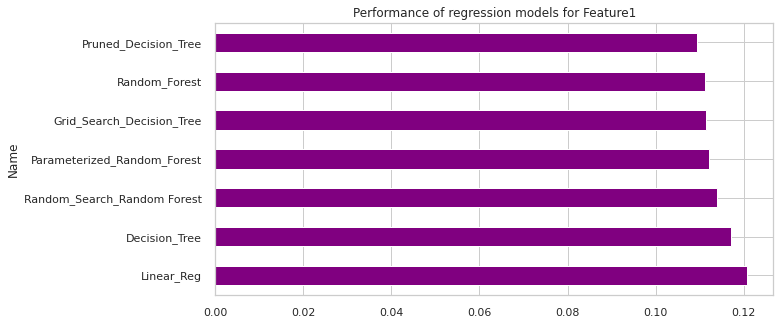

In [96]:
pd.DataFrame.from_dict({'Name':models,'RMSE': RMSE_test_feat1}).sort_values(by='RMSE',ascending=False).plot(x='Name',y='RMSE',kind='barh',sort_columns=True,figsize = (10,5),legend=False,title='Performance of regression models for Feature1', color = 'purple')

2. Comparing RMSE (Root ean Squared Error) values of models applied on the second set of feature columns.

   * Features List1: chocolate, fruity, caramel, peanutyalmondy,nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent
   * Target Variable: winpercent

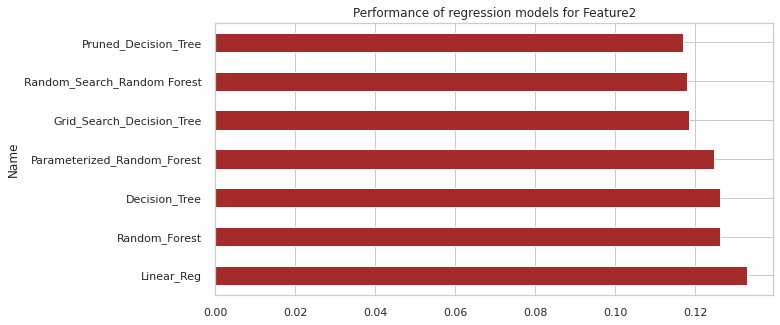

In [97]:
pd.DataFrame.from_dict({'Name':models,'RMSE': RMSE_test_feat2}).sort_values(by='RMSE',ascending=False).plot(x='Name',y='RMSE',kind='barh',sort_columns=True,figsize = (10,5),legend=False,title='Performance of regression models for Feature2', color = 'brown')

<a id=section9></a> 
### 9. Conclusion

From the RMSE values of various models, we find that the **Pruned Decision Tree Regression** has the minimum RMSE in both Feature Type 1 and Feature Type 2 predictions. Hence we can use this model for prediction of the favourite candy /popularity of a candy.